<h1><center><font size="6">Credit EDA Case Study</font></center></h1>

# Problem Statement

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

## Retrieving the data 

### Import libraries and set notebook options

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import scipy.stats as stats


In [3]:
# To display all columns 
pd.set_option('display.max_columns', 300)
#To display all the rows
pd.set_option('display.max_rows',300)
pd.set_option('display.width',1000)

### Reading data and first glimpse

In [4]:
# Read the csv file using 'read_csv'.
appData= pd.read_csv('application_data.csv')
prevData= pd.read_csv('previous_application.csv')


In [5]:
# Check the number of rows and columns in the dataframe
appData.shape

(307511, 122)

In [6]:
# First 5 rows of the dataframe appdata
appData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [7]:
# Check the number of rows and columns in the dataframe
prevData.shape

(1670214, 37)

In [8]:
# First 5 rows of the dataframe prevdata
prevData.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [9]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
# Check the column-wise info of the dataframe
appData.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [11]:
# Check the summary for the numeric columns 
appData.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

In [12]:
prevData.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning and Manipulation

### Check if the data types are mismatched

Observations
- As looking into the data above , it is observed that there are no data type mismatch

### Check missing data for application data

Let's check for missing values

Columns with more than 50% null values will not help us to make any inference , hence let's drop those

In [13]:
appData.isna().mean().round(2).value_counts()

0.00    65
0.50    10
0.68     7
0.59     6
0.14     6
0.51     4
0.66     4
0.49     3
0.53     3
0.69     3
0.55     3
0.70     3
0.20     1
0.56     1
0.31     1
0.48     1
0.47     1
dtype: int64

Observation
- By looking at above data we can conclude that we can set the threshold to drop the columns as 47%

- ie if a column has atleast 47% of nulls we can drop that column

In [14]:
#to check the percentage of null value columns
def drop_columns_with_nulls(df,threshold = 50):
    columns_with_null_count = df.isnull().mean().round(4).sort_values(ascending=False)*100
    columns_to_drop = list(columns_with_null_count[columns_with_null_count>threshold].index)
    print('columns with missing rows count greater than {}% is :'.format(threshold),len(columns_to_drop))
    print('list of columns getting dropped :: ',columns_to_drop)
    df.drop(labels = columns_to_drop,axis =1,inplace=True)
    print('\n \n Final shape of dataset :',df.shape)
    return df

In [15]:
#to check the colunms that have more than 47% percentage of null values
appData = drop_columns_with_nulls(appData,47)

columns with missing rows count greater than 47% is : 49
list of columns getting dropped ::  ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_B

### Check Missing data

In [16]:
def look_values_and_null(df):
    for col in df.columns.tolist():
        print(df[col].value_counts(normalize=True,dropna=False) , ', has ',df[col].isnull().sum(), 'null values \n')

In [17]:
look_values_and_null(appData)

100002    0.000003
337664    0.000003
337661    0.000003
337660    0.000003
337659    0.000003
            ...   
218992    0.000003
218991    0.000003
218990    0.000003
218989    0.000003
456255    0.000003
Name: SK_ID_CURR, Length: 307511, dtype: float64 , has  0 null values 

0    0.919271
1    0.080729
Name: TARGET, dtype: float64 , has  0 null values 

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64 , has  0 null values 

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64 , has  0 null values 

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64 , has  0 null values 

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64 , has  0 null values 

0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
8     0.000007
9     0.000007
12    0.000007
10    0.000007
19    0.000007
11    0.000003
Name: CNT_CHIL

10    0.122669
11    0.121066
12    0.111323
13    0.100676
14    0.090020
9     0.089050
15    0.080774
16    0.066290
8     0.049192
17    0.048454
7     0.029693
18    0.029427
6     0.018998
19    0.012513
5     0.011830
4     0.006797
3     0.004000
20    0.003889
21    0.001317
2     0.000992
22    0.000488
1     0.000280
23    0.000133
0     0.000130
Name: HOUR_APPR_PROCESS_START, dtype: float64 , has  0 null values 

0    0.984856
1    0.015144
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64 , has  0 null values 

0    0.949231
1    0.050769
Name: REG_REGION_NOT_WORK_REGION, dtype: float64 , has  0 null values 

0    0.959341
1    0.040659
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64 , has  0 null values 

0    0.921827
1    0.078173
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64 , has  0 null values 

0    0.769546
1    0.230454
Name: REG_CITY_NOT_WORK_CITY, dtype: float64 , has  0 null values 

0    0.820445
1    0.179555
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64 , ha

In [18]:
appData['CODE_GENDER'].replace(['XNA'],[appData['CODE_GENDER'].mode()[0]] , inplace=True)
appData['CODE_GENDER'].value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

For few columns imputaion will for a biased view, for those we will bin them into unknown / others

In [19]:
# To fill the unknown missing values while not causing any bias
appData['OCCUPATION_TYPE'].fillna('Unknown')
appData['NAME_TYPE_SUITE'].fillna('Unknown')
appData['ORGANIZATION_TYPE'].fillna('Unknown')

# TO fill in missing values
appData['CNT_FAM_MEMBERS'].replace(['XNA'],[appData['CNT_FAM_MEMBERS'].mode()[0]] , inplace=True)
appData['DAYS_LAST_PHONE_CHANGE'].replace(['XNA'],[appData['DAYS_LAST_PHONE_CHANGE'].mode()[0]] , inplace=True)

In [20]:
appData[appData['AMT_GOODS_PRICE'].isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
724         100837       0    Revolving loans           F            N               Y             2           45000.0    135000.0       6750.0              NaN             NaN  Commercial associate  Secondary / secondary special               Married    House / apartment                    0.024610      -10072           -381             -519.0            -1834           1               1                1                 1           0           0             Core staff              4.0                     2                            2                  WEDNESDAY                       14                           0                           0                            0                       0                       0                        0            Kindergarten      0.378174           NaN                       2.0                       1.0                       2.0                       1.0                 -2011.0                0                1                0   
5937        106955       0    Revolving loans           F            N               N             0          157500.0    450000.0      22500.0              NaN             NaN               Working  Secondary / secondary special               Married    House / apartment                    0.010006      -11993          -2921            -1289.0            -1948           1               1                1                 1           1           1  Private service staff              2.0                     2                            2                   SATURDAY                       13                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.464614      0.537070                       0.0                       0.0                       0.0                       0.0                  -476.0                0                1                0   
6425        107494       0    Revolving loans           F            N               N             0           67500.0    202500.0      10125.0              NaN             NaN               Working               Higher education               Married    House / apartment                    0.008474       -9727          -2712            -4132.0             -800           1               1                1                 1           1           0            Accountants              2.0                     2                            2                  WEDNESDAY                       18                           0                           0                            0                       0                       0                        0           Trade: type 7      0.565849           NaN                       1.0                       1.0                       1.0                       0.0                  -643.0                0                0                0   
6703        107822       0    Revolving loans           F       

Text(0.5, 1.0, 'AMT_INCOME_TOTAL')

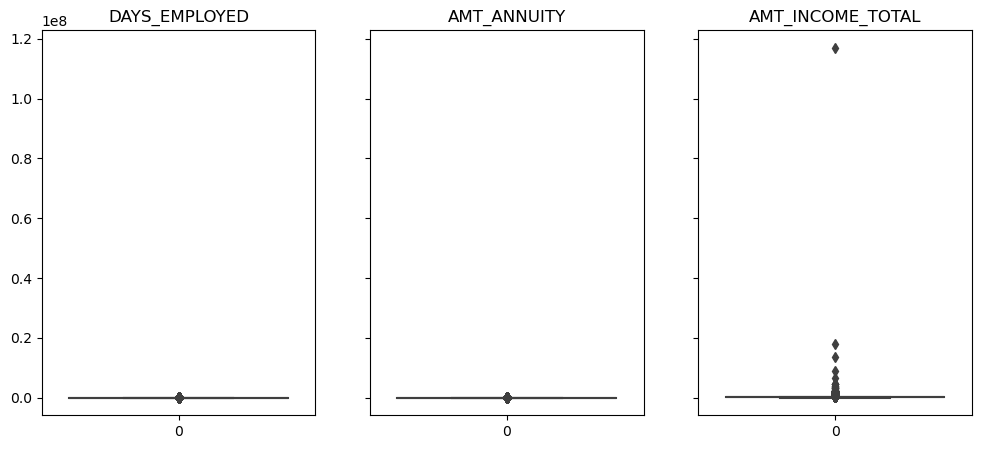

In [21]:
f,axes =plt.subplots(1,3,figsize=(12,5),sharey=True)
sns.boxplot(ax=axes[0],data=appData.DAYS_EMPLOYED)
axes[0].set_title('DAYS_EMPLOYED')
sns.boxplot(ax=axes[1],data=appData.AMT_ANNUITY)
axes[1].set_title('AMT_ANNUITY')
sns.boxplot(ax=axes[2],data=appData.AMT_INCOME_TOTAL)
axes[2].set_title('AMT_INCOME_TOTAL')

Observation
- These columns DAYS_EMPLOYES, AMT_ANNUITY, AMT_INCOME_PRICE have outliers, hence we will preceed with the outlier treatment. 

To convert days to years for easier calculation

In [22]:
appData['DAYS_BIRTH'] = appData['DAYS_BIRTH'].apply(lambda x: round(-x/365,1)) 
appData['DAYS_EMPLOYED'] = appData['DAYS_EMPLOYED'].apply(lambda x: round(-x/30)) 
appData['DAYS_REGISTRATION'] = appData['DAYS_REGISTRATION'].apply(lambda x: round(-x/30)) 
appData['DAYS_ID_PUBLISH'] = appData['DAYS_ID_PUBLISH'].apply(lambda x: round(-x/30)) 
appData.rename(columns={'DAYS_BIRTH': 'CUST_AGE', 'DAYS_EMPLOYED': 'MONTHS_EMPLOYED' , 'DAYS_REGISTRATION': 'MONTHS_REGISTRATION', 'DAYS_ID_PUBLISH':'MONTHS_ID_PUBLISH' }, inplace=True)

In [23]:
print(appData['CUST_AGE'].value_counts(bins = range(30,65,5)),'\n')
print(appData['MONTHS_EMPLOYED'].value_counts(),'\n')
print(appData['MONTHS_REGISTRATION'].value_counts(),'\n')
print(appData['MONTHS_ID_PUBLISH'].value_counts(),'\n')

(35.0, 40.0]      42860
(40.0, 45.0]      41228
(29.999, 35.0]    40291
(45.0, 50.0]      35276
(50.0, 55.0]      34994
(55.0, 60.0]      33073
Name: CUST_AGE, dtype: int64 

-12175    55374
 7         3623
 8         3461
 6         3299
 4         3294
          ...  
 549          1
 555          1
 571          1
 572          1
 552          1
Name: MONTHS_EMPLOYED, Length: 560, dtype: int64 

1      1515
2      1457
4      1430
26     1378
12     1374
       ... 
690       1
791       1
588       1
635       1
748       1
Name: MONTHS_REGISTRATION, Length: 663, dtype: int64 

136    3902
138    3880
140    3804
142    3752
146    3739
144    3683
135    3592
137    3556
143    3521
139    3519
148    3508
134    3502
141    3500
150    3446
147    3411
152    3331
151    3307
145    3268
149    3249
154    3231
153    3055
133    2966
156    2917
155    2888
132    2834
158    2689
157    2533
159    2403
160    2347
131    2223
130    2008
161    1942
162    1912
164    1771
163

In [24]:
appData['MONTHS_EMPLOYED']= appData['MONTHS_EMPLOYED'].abs()

##### Missing value treatment by imputation

In [25]:
appData['AMT_REQ_CREDIT_BUREAU_YEAR']=appData['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(appData['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])
appData['AMT_REQ_CREDIT_BUREAU_QRT']=appData['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(appData['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
appData['AMT_REQ_CREDIT_BUREAU_MON']=appData['AMT_REQ_CREDIT_BUREAU_MON'].fillna(appData['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
appData['AMT_REQ_CREDIT_BUREAU_WEEK']=appData['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(appData['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
appData['AMT_REQ_CREDIT_BUREAU_DAY']=appData['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(appData['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
appData['AMT_REQ_CREDIT_BUREAU_HOUR']=appData['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(appData['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])

Text(0.5, 1.0, 'OBS_60_CNT_SOCIAL_CIRCLE')

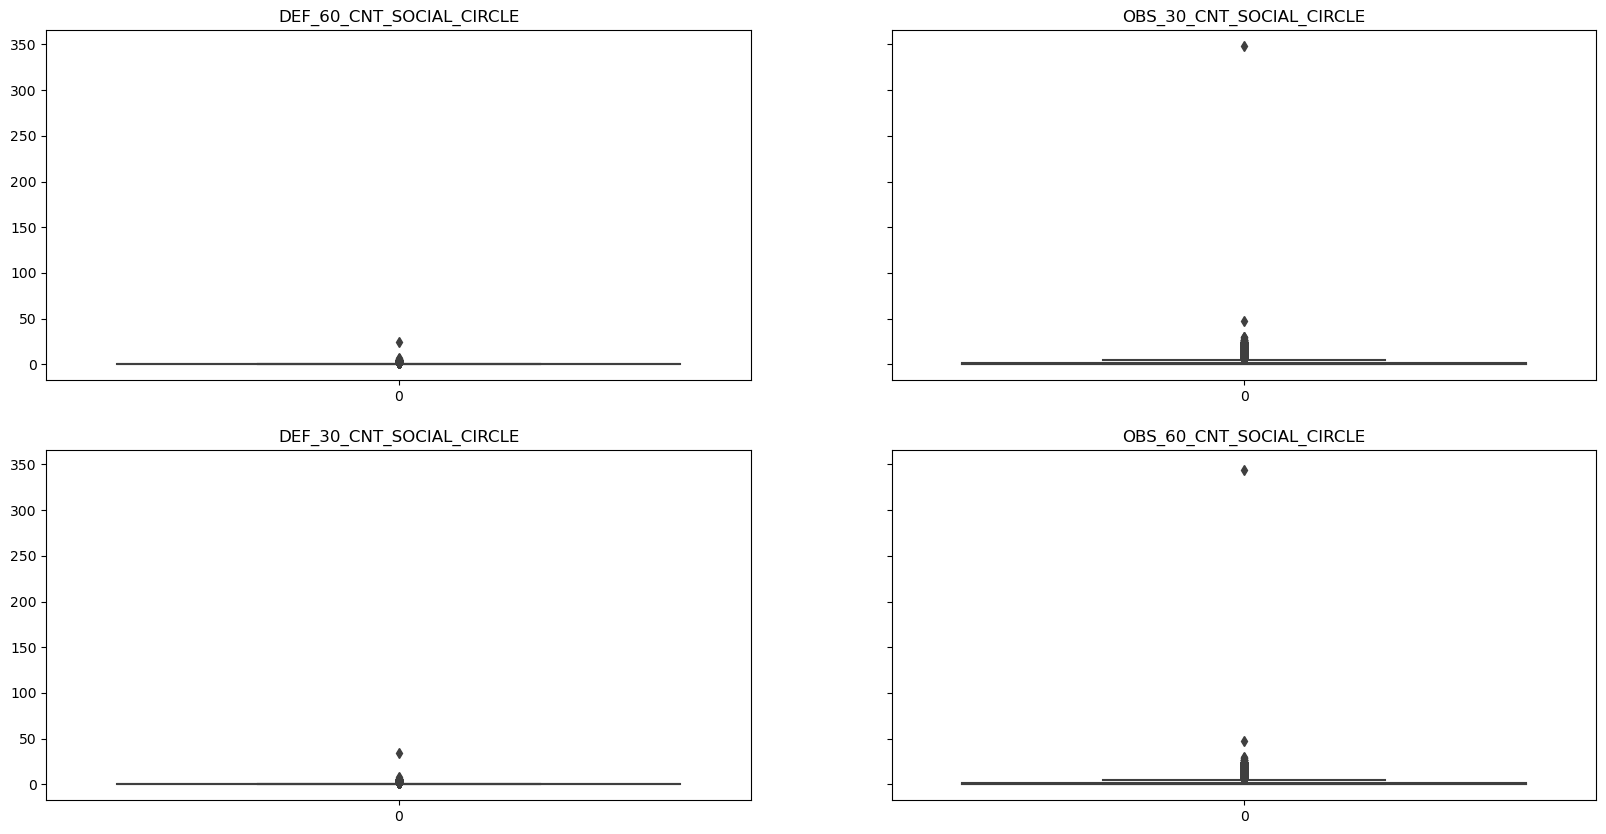

In [26]:
f,axes =plt.subplots(2,2,figsize=(20,10),sharey=True)
sns.boxplot(ax=axes[0,0],data=appData.DEF_60_CNT_SOCIAL_CIRCLE)
axes[0,0].set_title('DEF_60_CNT_SOCIAL_CIRCLE')
sns.boxplot(ax=axes[0,1],data=appData.OBS_30_CNT_SOCIAL_CIRCLE)
axes[0,1].set_title('OBS_30_CNT_SOCIAL_CIRCLE')
sns.boxplot(ax=axes[1,0],data=appData.DEF_30_CNT_SOCIAL_CIRCLE)
axes[1,0].set_title('DEF_30_CNT_SOCIAL_CIRCLE')
sns.boxplot(ax=axes[1,1],data=appData.OBS_60_CNT_SOCIAL_CIRCLE)
axes[1,1].set_title('OBS_60_CNT_SOCIAL_CIRCLE')

In [27]:
# Filling missing values in DEF_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE , OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE hence using median to fill null values
appData['DEF_60_CNT_SOCIAL_CIRCLE']=appData['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(appData['DEF_60_CNT_SOCIAL_CIRCLE'].median())
appData['DEF_30_CNT_SOCIAL_CIRCLE']=appData['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(appData['DEF_30_CNT_SOCIAL_CIRCLE'].median())
appData['OBS_30_CNT_SOCIAL_CIRCLE']=appData['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(appData['OBS_30_CNT_SOCIAL_CIRCLE'].median())
appData['OBS_60_CNT_SOCIAL_CIRCLE']=appData['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(appData['OBS_60_CNT_SOCIAL_CIRCLE'].median())


<AxesSubplot:xlabel='EXT_SOURCE_2'>

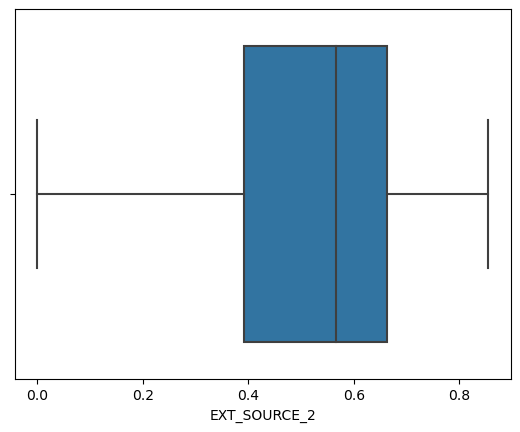

In [28]:
sns.boxplot(appData.EXT_SOURCE_2)

In [29]:
# As there are no outliers in EXT_SOURCE_2, filling null values with mean
appData['EXT_SOURCE_2']=appData['EXT_SOURCE_2'].fillna(appData['EXT_SOURCE_2'].mean())

##### Outlier Treatment 

In [30]:
#Excluding values outside 99%ile in each of the 3 variables
appData=appData[appData.AMT_ANNUITY<np.nanpercentile(appData['AMT_ANNUITY'], 99)]
appData=appData[appData.MONTHS_EMPLOYED<np.nanpercentile(appData['MONTHS_EMPLOYED'], 99)]
appData=appData[appData.AMT_INCOME_TOTAL<np.nanpercentile(appData['AMT_INCOME_TOTAL'], 99)]

## Checking Imbalance 

In [31]:
appData["TARGET"].value_counts(normalize=True)

0    0.91261
1    0.08739
Name: TARGET, dtype: float64

Observation
- Data is imbalanced

Dividing the dataset into two different datasets based upon 'Target' value.


In [32]:
target0=appData.loc[appData["TARGET"]==0]
target1=appData.loc[appData["TARGET"]==1]

## Univariate analysis

In [33]:
# Categorical columns

categorical_app = list(set(appData.columns) - set(appData.describe().columns))
categorical_app = categorical_app +list(filter(lambda x: 'FLAG' in x or 'REG_' in x or 'LIVE_' in x or 'TARGET' in x,list(appData.columns)))                    
categorical_app


['ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START',
 'CODE_GENDER',
 'OCCUPATION_TYPE',
 'TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [34]:
# Numerical columns
numerical_app = list(set(appData.columns) - set(categorical_app))
numerical_app

['MONTHS_ID_PUBLISH',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'MONTHS_EMPLOYED',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'EXT_SOURCE_2',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_ANNUITY',
 'CUST_AGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'MONTHS_REGISTRATION',
 'REGION_POPULATION_RELATIVE',
 'SK_ID_CURR',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'CNT_CHILDREN',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_QRT']

##### TARGET  

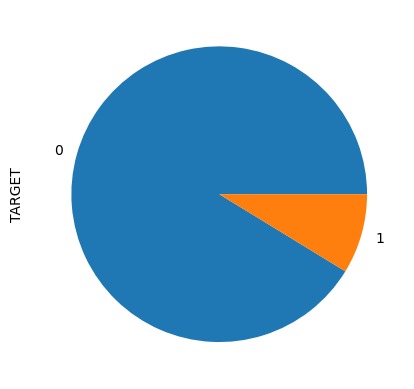

In [35]:
appData.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

Observation
- Only a small percentage of people are facing difficulty in loan repayment

In [36]:
def plot_target(df,feature,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,7))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,15))
    sns.set_color_codes("pastel")
    ax1.title.set_text('All the clients')
    ax1.title.set_fontsize(20)
    for item in ([ ax1.xaxis.label, ax1.yaxis.label] +ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(14)

    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    ax2.title.set_text('Clients with difficulty in payment')
    ax2.title.set_fontsize(20)
    for item in ([ ax2.xaxis.label, ax2.yaxis.label] +ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(14)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)

    if(not horizontal_layout):
        fig.subplots_adjust(hspace=0.8)
    plt.show();

In [37]:
def plot_distribution(var):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(target1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(target0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=10)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

##### CODE_GENDER

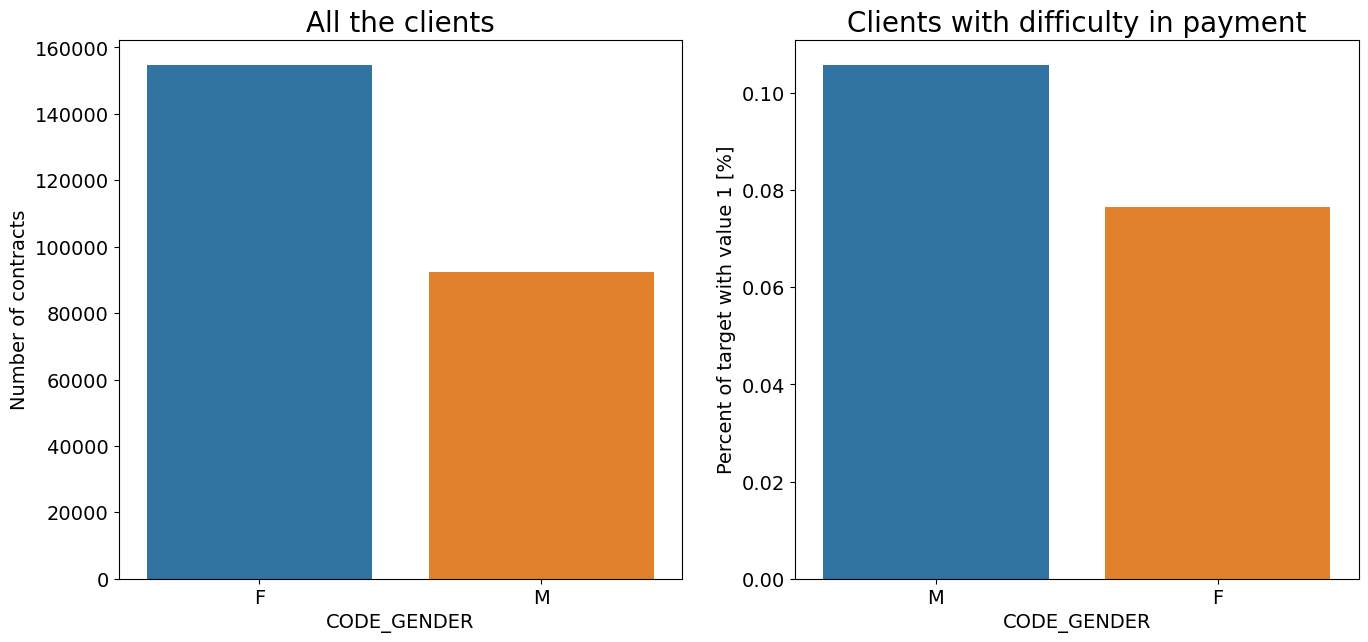

In [38]:
plot_target(appData,'CODE_GENDER')

Observations
- Number of male clients is half the number of female clients 
- Males clients have more difficulties cpmpared to female clients while repaying the loan
- 10% of male clients, 7% of female clients have difficulty in repaying their loan

##### NAME_CONTRACT_TYPE 

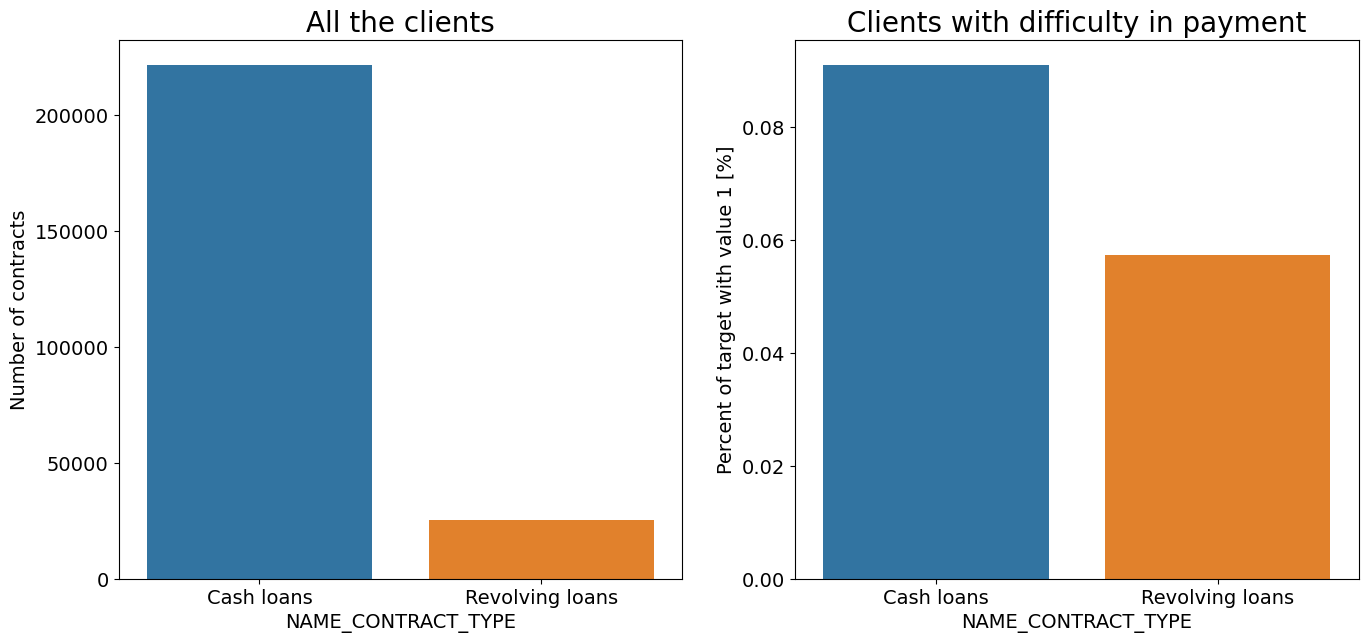

In [39]:
plot_target(appData,'NAME_CONTRACT_TYPE')

Observation
- Revolving loans have low contracts when compared to cash loans
- More number of Revolving loans are not repaid compared to cash loans (compared in frequencies)

##### FLAG_OWN_CAR and FLAG_OWN_REALTY

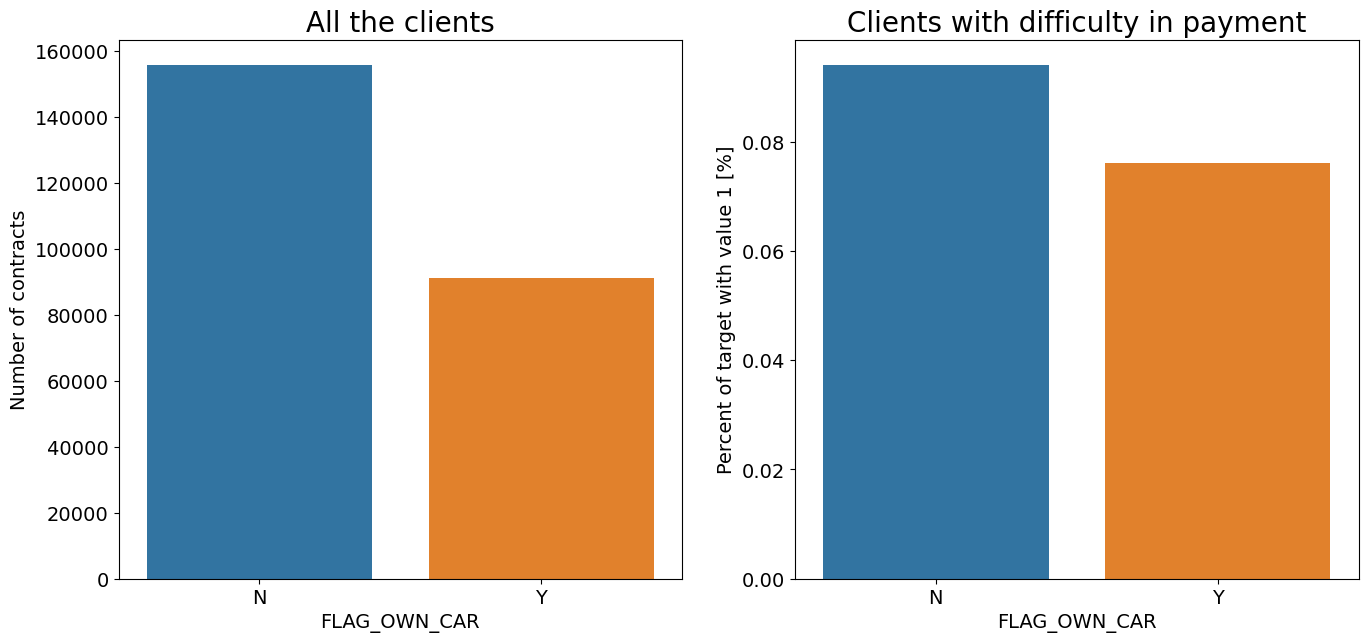

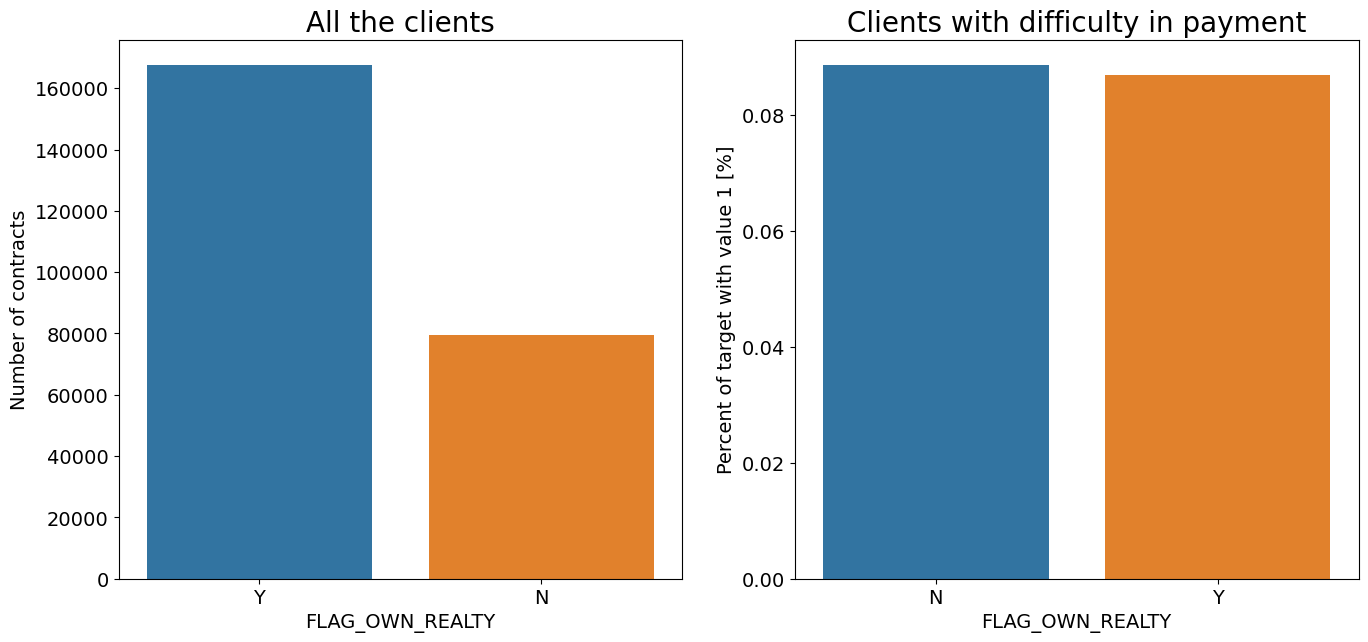

In [40]:
plot_target(appData,'FLAG_OWN_CAR')
plot_target(appData,'FLAG_OWN_REALTY')

Observation for FLAG_OWN_CAR
- Clients who own a car are almost half of those who doesn't own a car. 
- The clients that owns a car are less likely to not repay a car that the ones that own.


Observation for FLAG_OWN_REALTY
- The clients that owns real estate are more than double of the ones that don't own.
- Both the clients (owning real estate or not owning) have similar difficulties in repayment of their loan.

##### NAME_FAMILY_STATUS

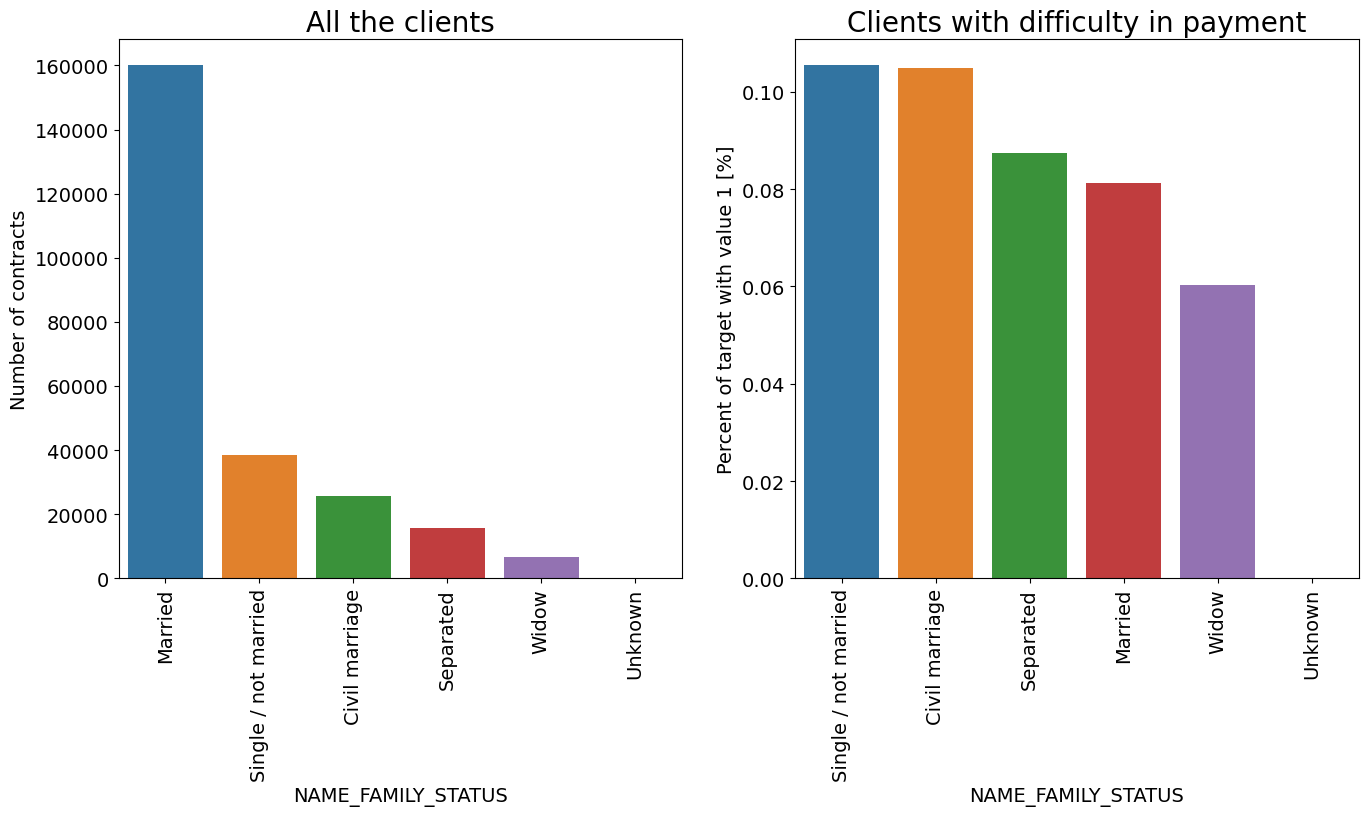

In [41]:
plot_target(appData,'NAME_FAMILY_STATUS',True, True)

Observation
- Most clients are married followed by single/not married, civil, seperated, widow and unknown. 
- Civil marriage clients have most percentage of loan non repayment while widows followed by unknown are the lowest

##### CNT_CHILDREN

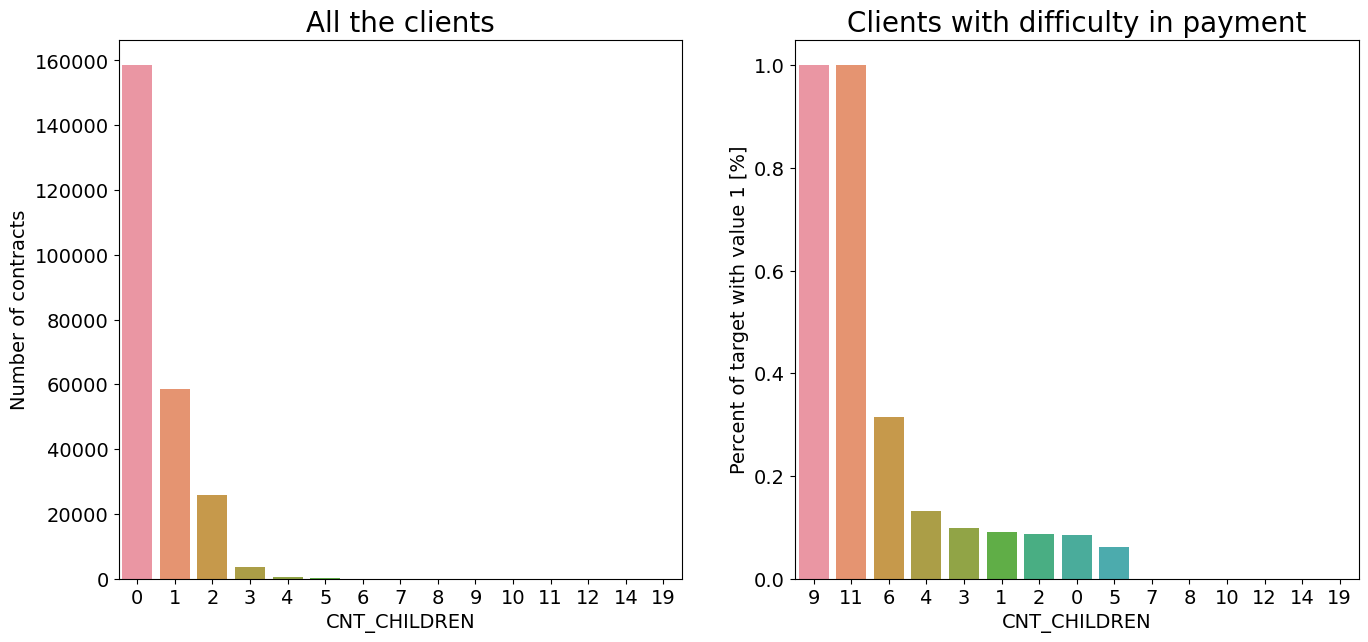

In [42]:
plot_target(appData,'CNT_CHILDREN')

Observation
- Most clients with loans have no children, followed by 1 child, 2 child while clients with more than 5 children are the least with loans. 
- Clients with higher number of children have difficulties in loan repayment, whilst clients with 9 and 11 children are most likely not repay the loan. 

##### CNT_FAM_MEMBERS

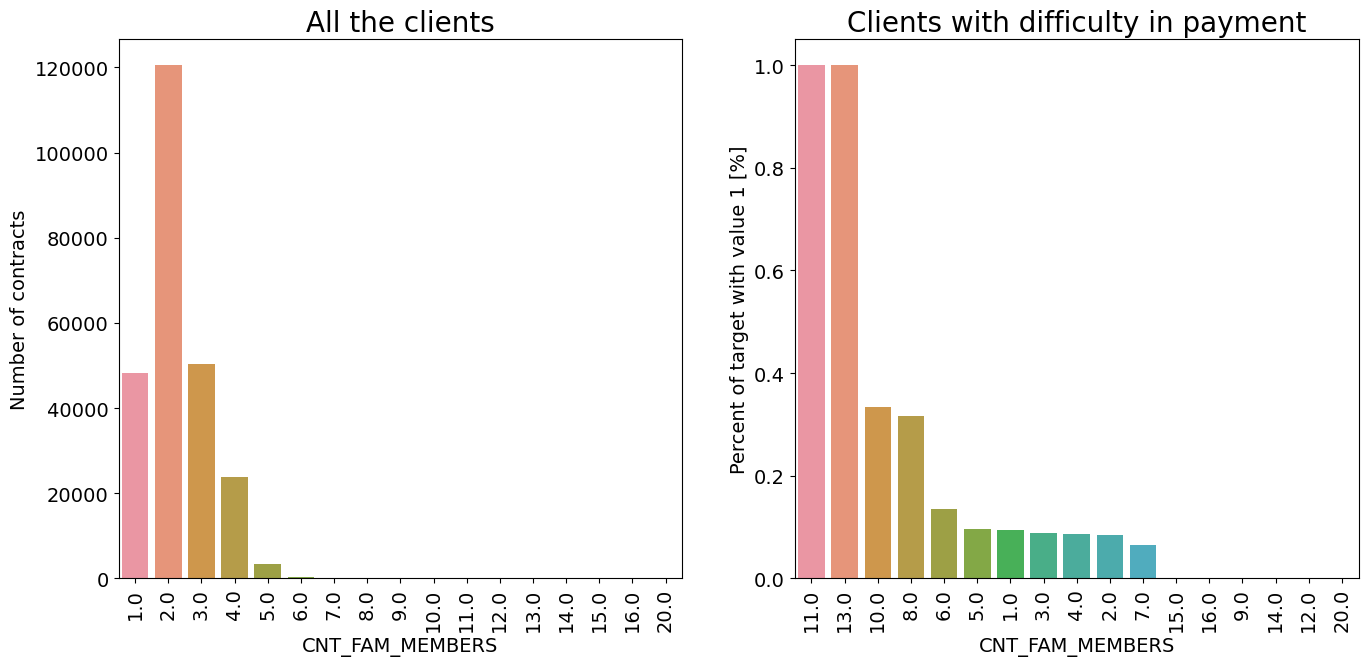

In [43]:
plot_target(appData,'CNT_FAM_MEMBERS',True)

Observation
- Clients with 2 family members are the most with loans, followed by single people an family of 3 etc.,. 
- Interms of repayment, family with 11,13 have 100% non repayment while family with 6,8 members is over 30% non repayment. 

##### NAME_INCOME_TYPE

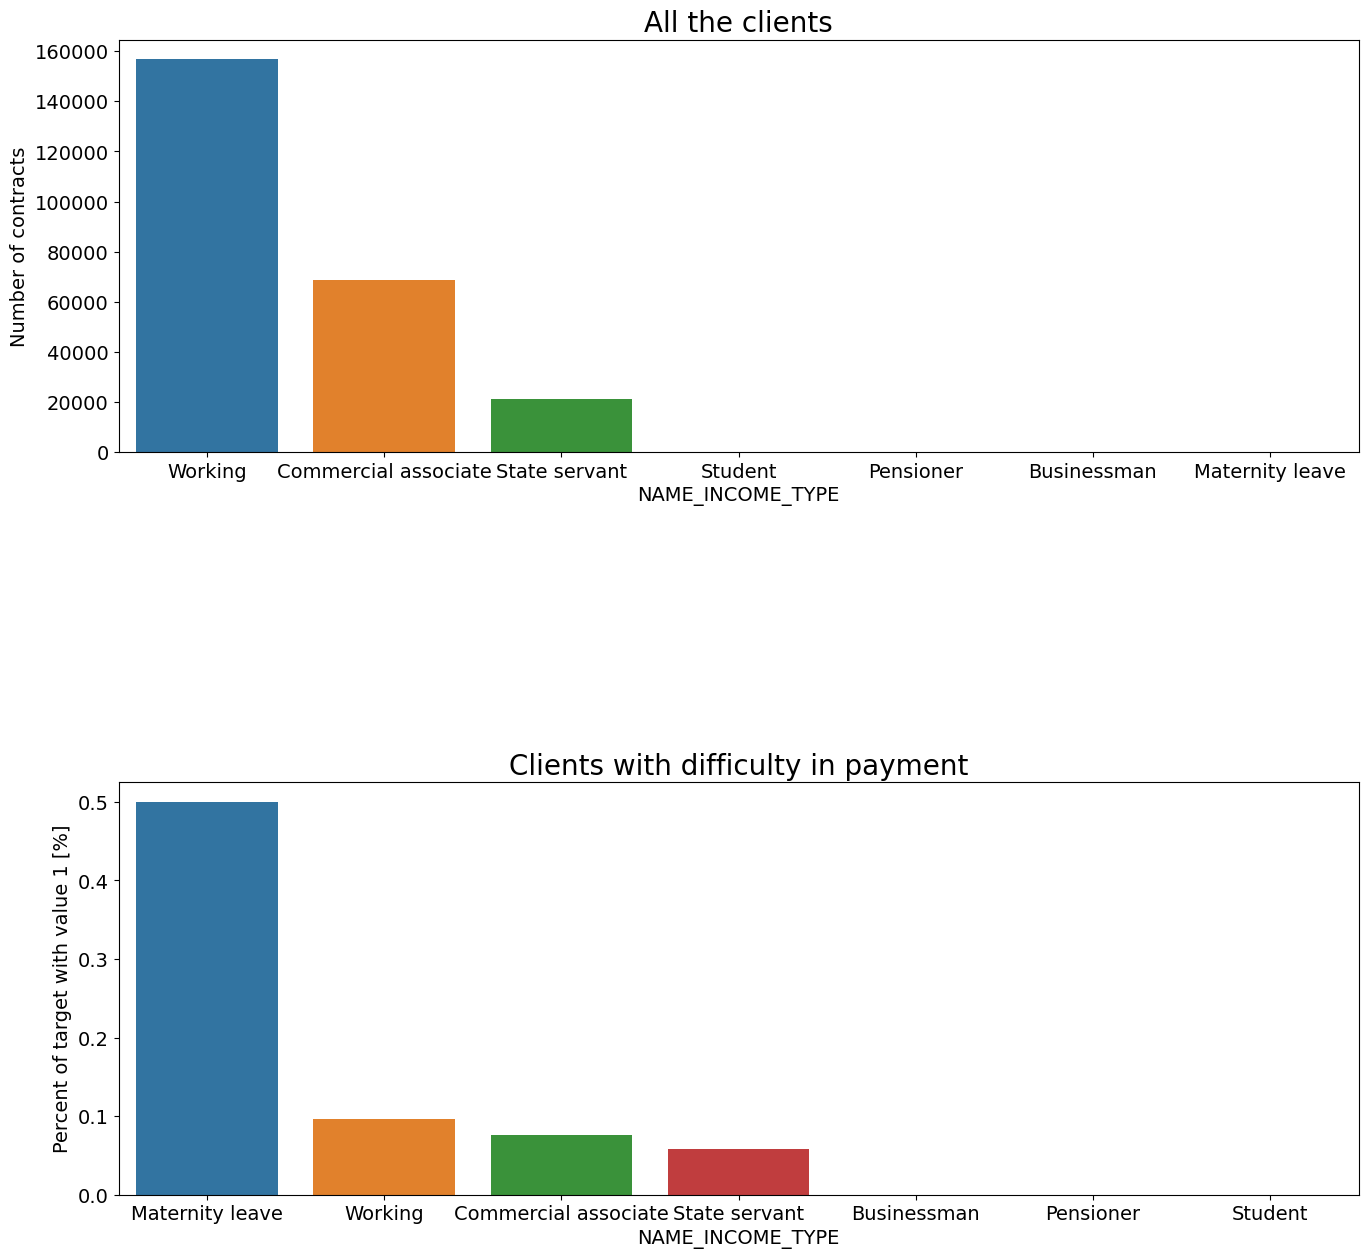

In [44]:
plot_target(appData,'NAME_INCOME_TYPE', False, False)

Observation
- Most clients are working, followed by commercial assosciate, Pensioner, stateservent whilst maternity leave clients are the least. 
- Maternity leave clients followed by unemplyed clients have highest percentage almost at 40% of non repayments of their loans. 

##### OCCUPATION_TYPE

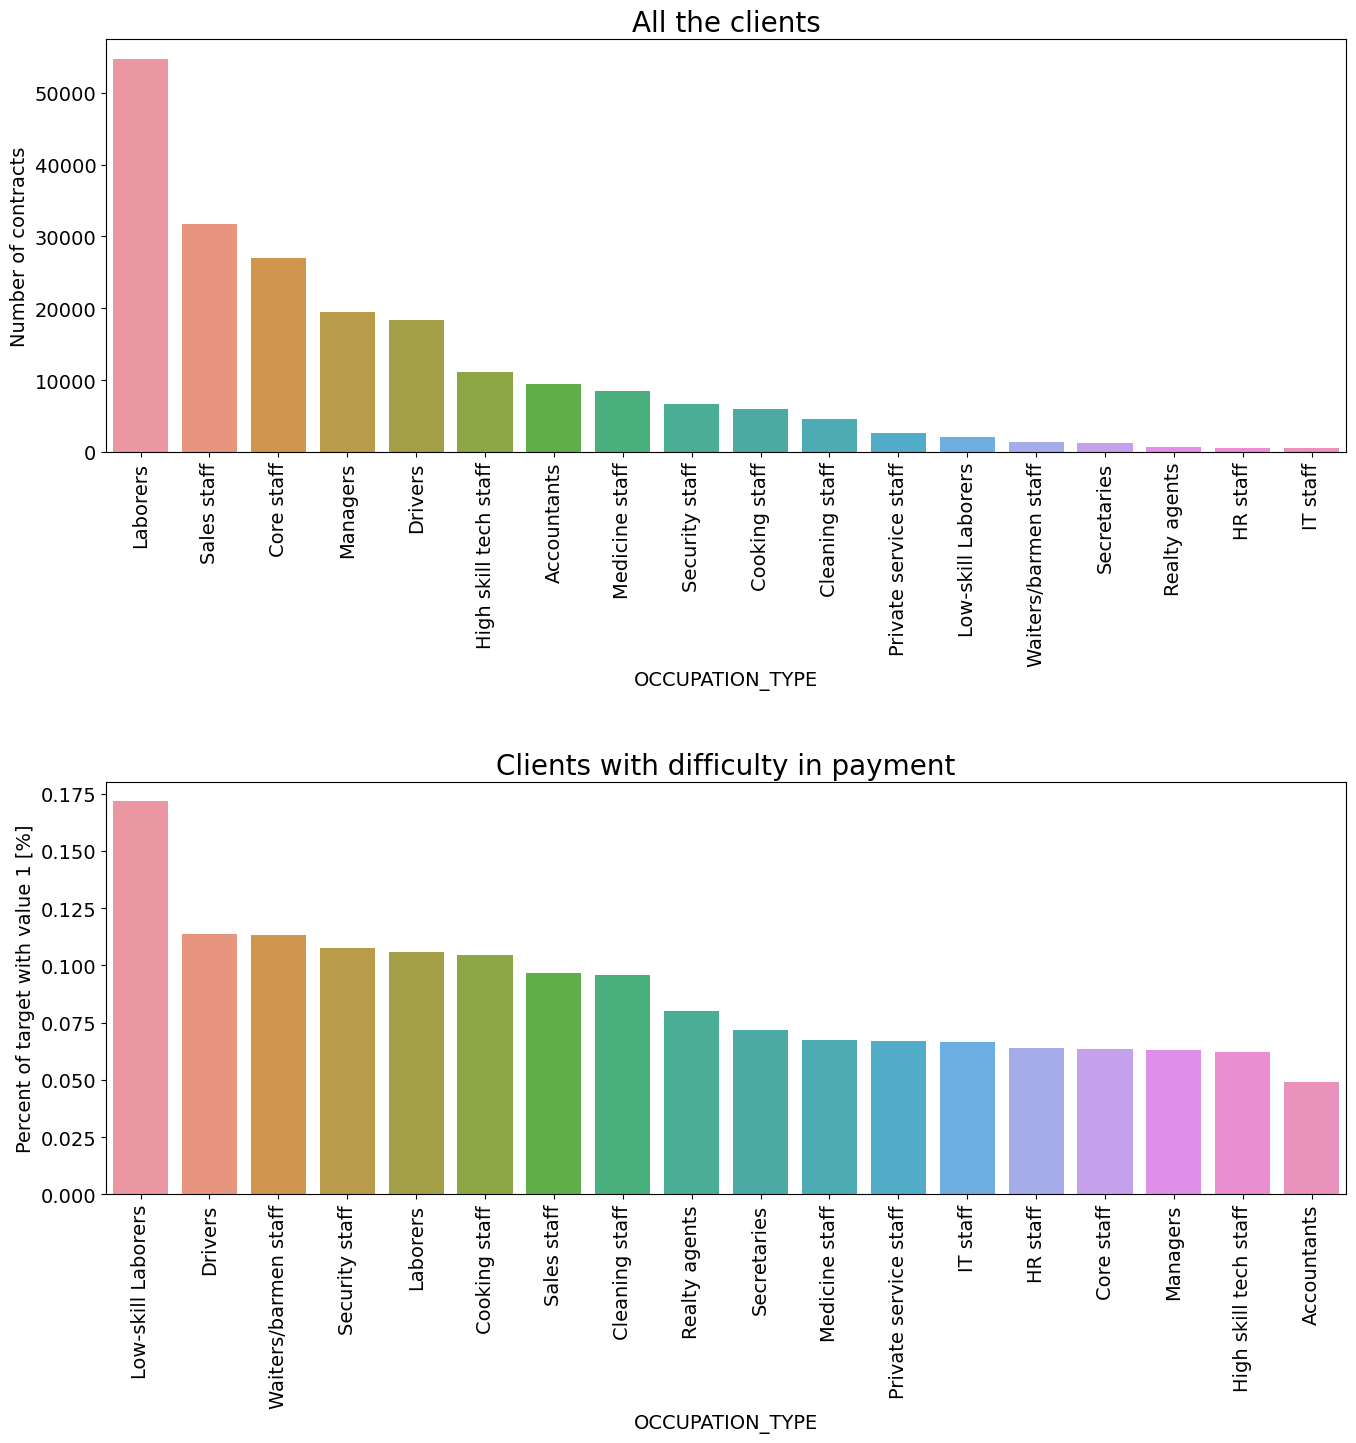

In [45]:
plot_target(appData,'OCCUPATION_TYPE', True, False)

Observation
- Laborers are the clients with highest loans taken while clients from IT staff are the least
- In terms of non repayment of the loan, low-skill laborers are the highest at 17.5% followed by Drivers, Waiters, security staff and the least being accountants at around 50%

##### ORGANIZATION_TYPE

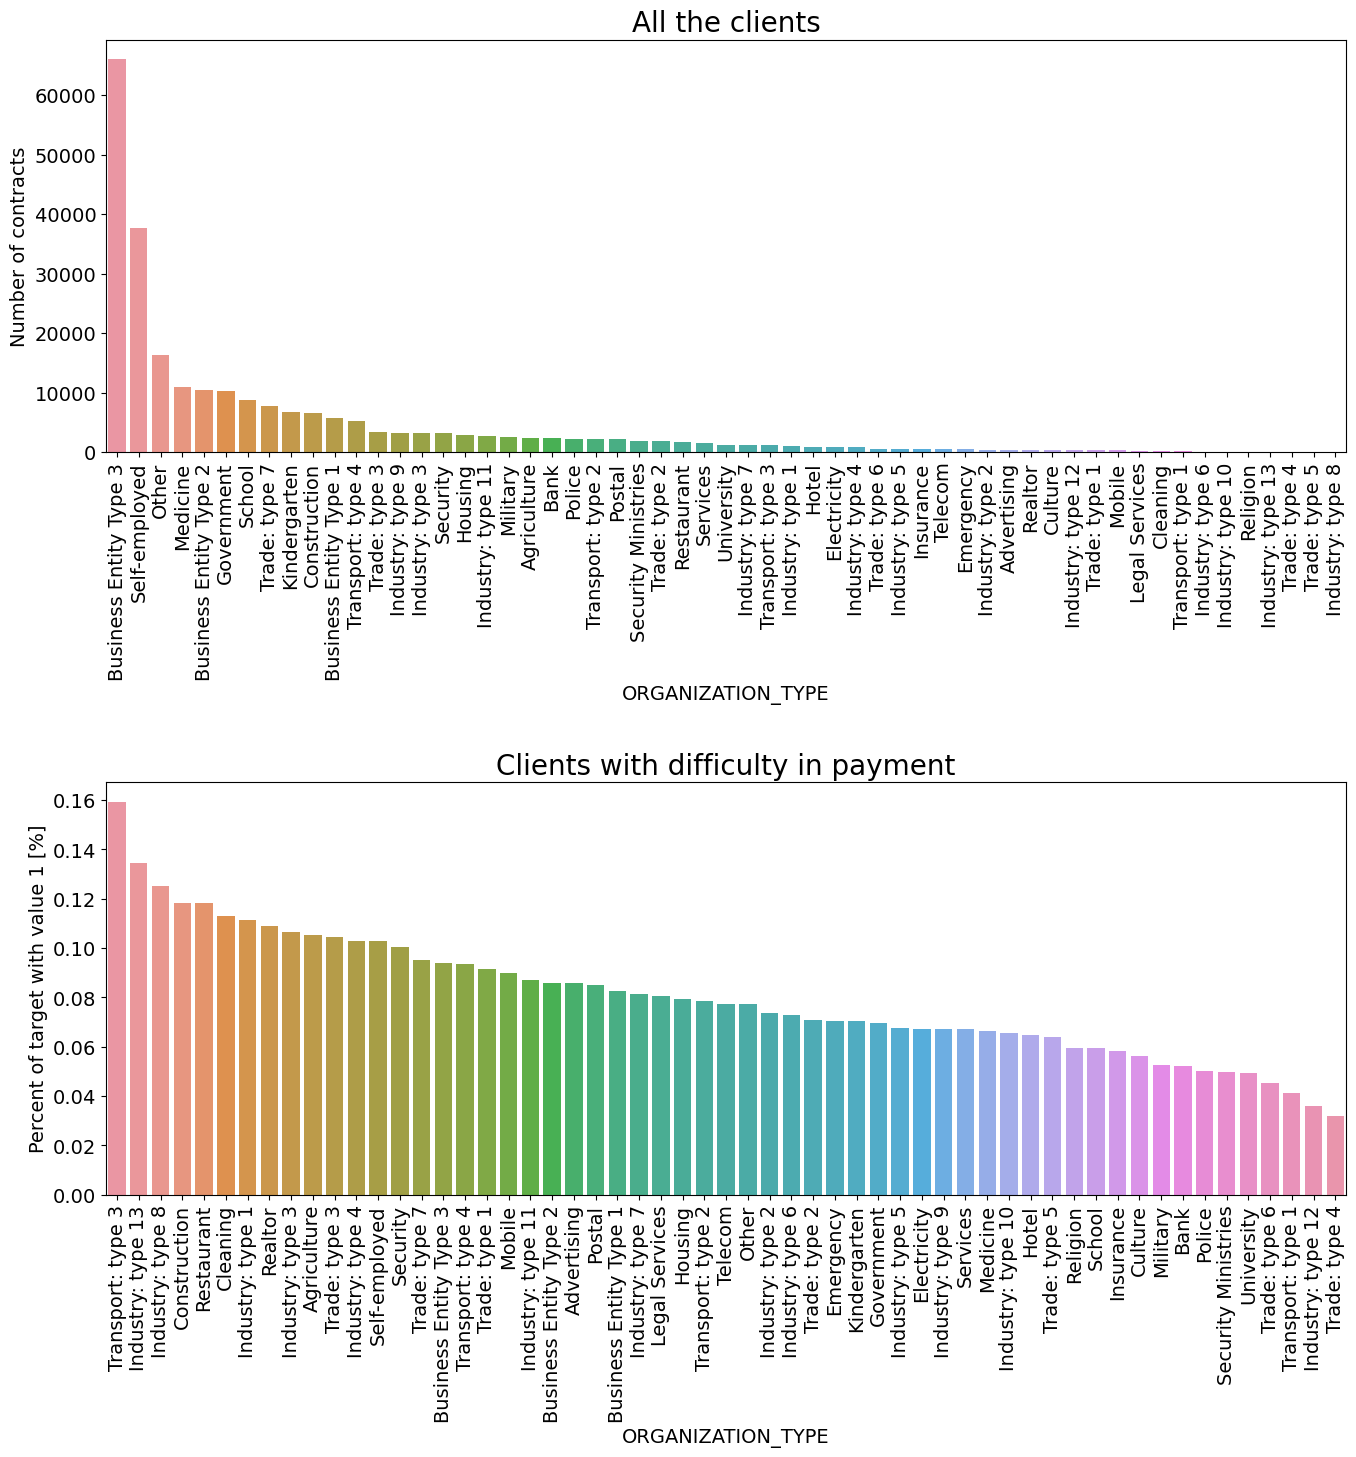

In [46]:
plot_target(appData,'ORGANIZATION_TYPE',True, False)

Observation
- Transport type3 followed bt industry type1, industry type8 have the highest percentage of loan non repayment while trade type 4 is the least percentage of loan non repayment aroung 0.4%

##### NAME_EDUCATION_TYPE

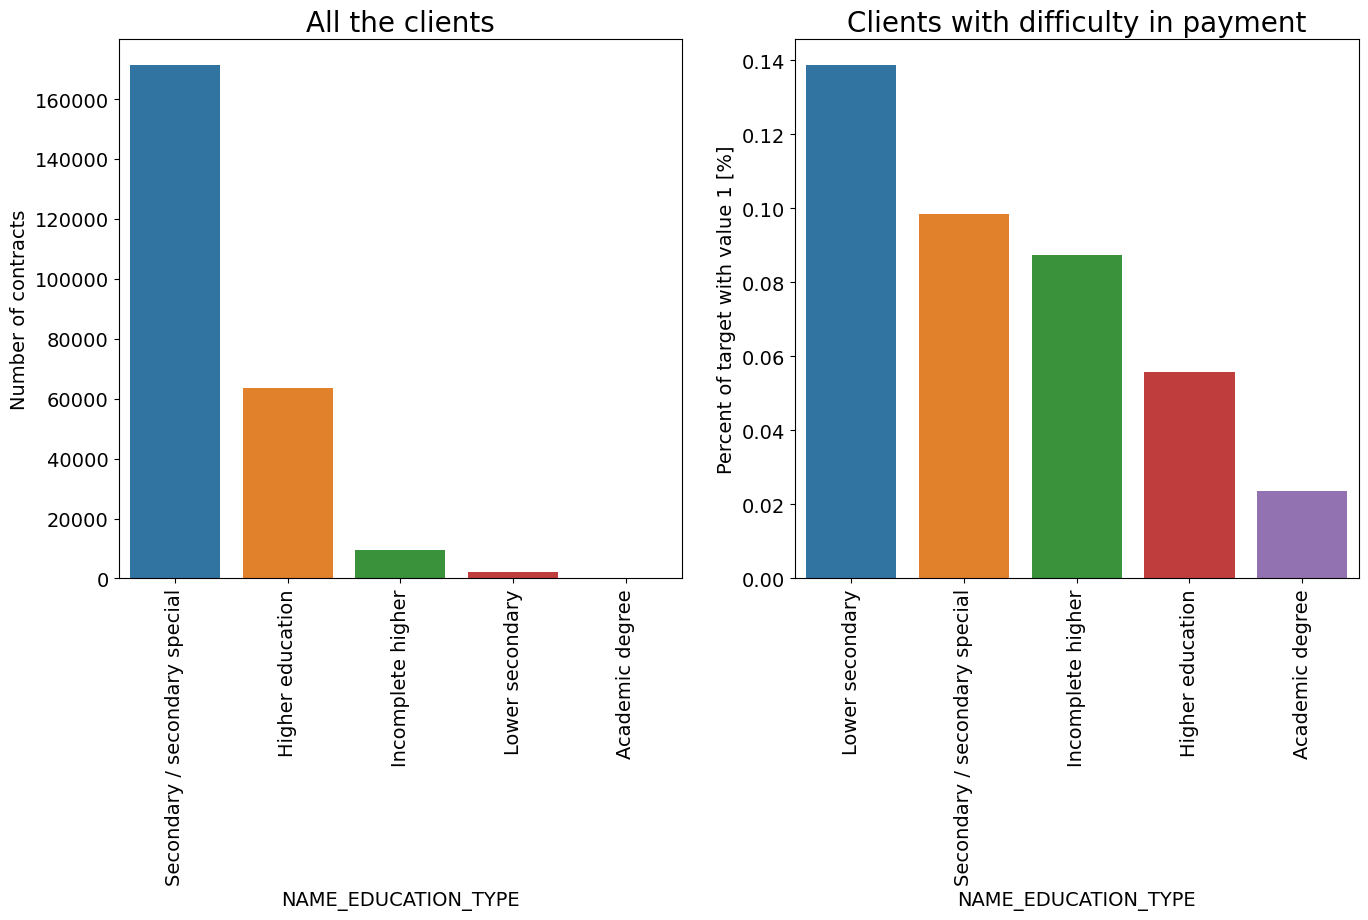

In [47]:
plot_target(appData,'NAME_EDUCATION_TYPE', True)

Observation
- Most clients with loan are secondary education followed by higher education while academic degree is the least clients. 
- Academic degree clients have lowest percentage of loan nonrepayment arounf 2% while lower secondary clients have the highest percentage around 11%

##### NAME_HOUSING_TYPE

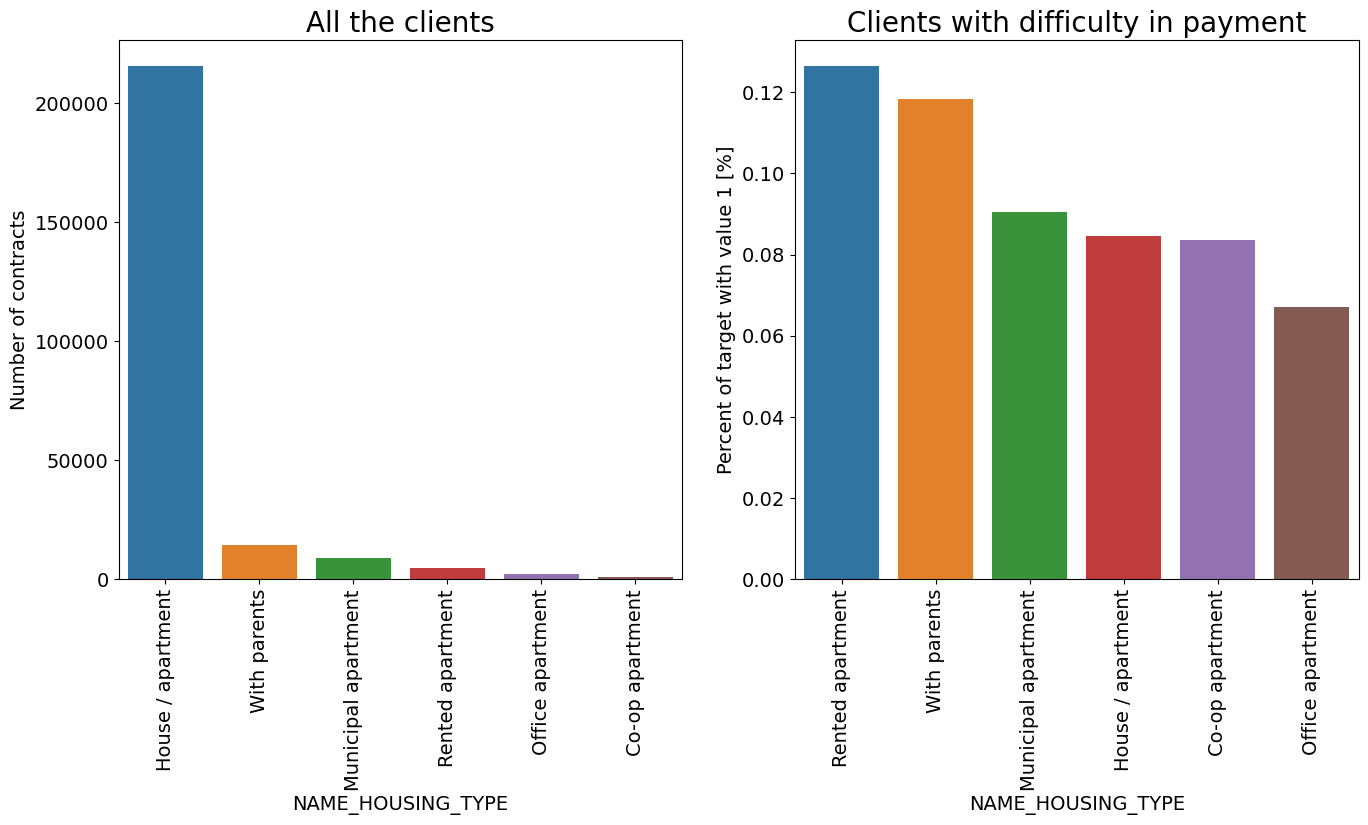

In [48]:
plot_target(appData,'NAME_HOUSING_TYPE', True)

Observation
- Apartments are the highest housing type loans taken by the clients. 
- Clients with rented appartments have the most difficulty in loan repayments at 12% 

### Total Income distribution of the clients

In [49]:
# Plot distribution of a single feature 
def plot_dist(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(appData[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 

In [50]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_dist_comp(var,nrow=2):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(data = appData, x =feature, bw=0.5,hue="TARGET",legend=True)
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

##### Distribution of AMT_INCOME_TOTAL

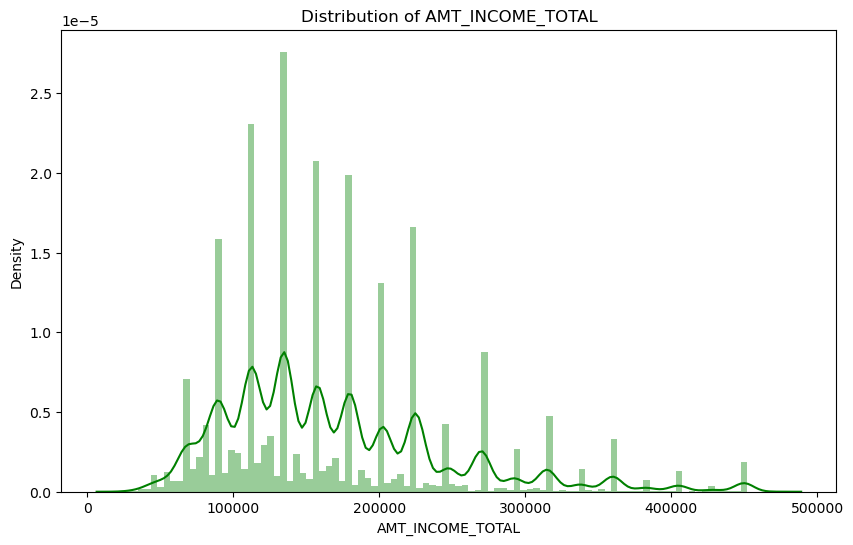

In [51]:
plot_dist('AMT_INCOME_TOTAL','green')

Observation
- More clients have total income between 80000 and 250000.

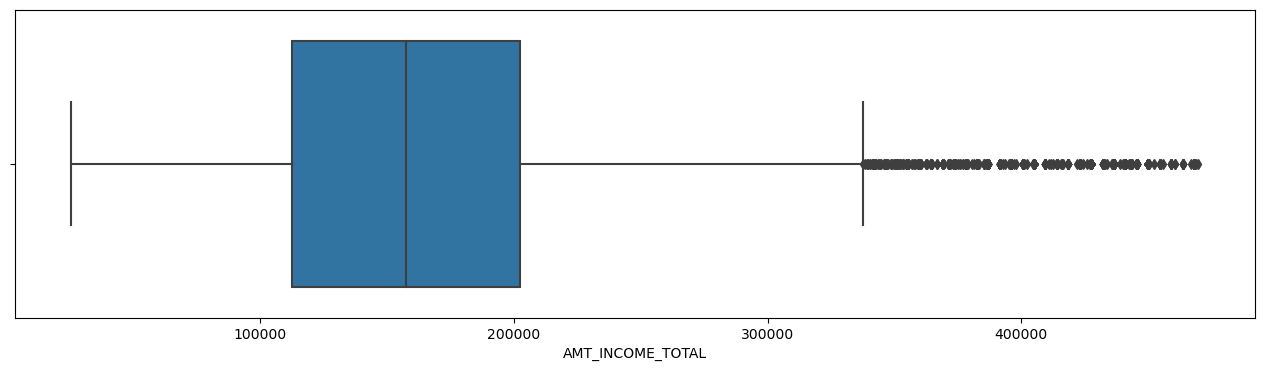

In [52]:
plt.figure(figsize= (16,4))
sns.boxplot(appData['AMT_INCOME_TOTAL'])
plt.show()

Observation 
- The AMT_INCOME_TOTAL column has many outliers and incase of replacing them, use the median. 

##### AMT_CREDIT

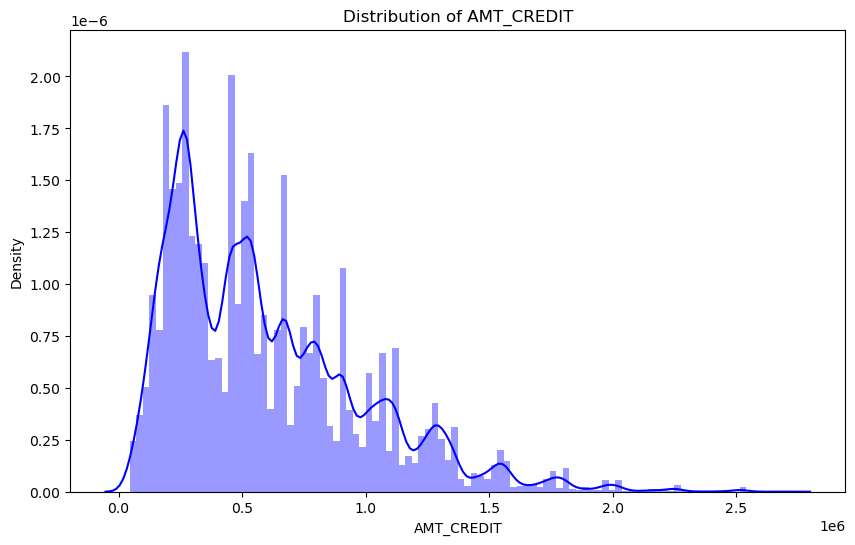

In [53]:
plot_dist('AMT_CREDIT','blue')

Observation
- This plot is a right skewed distrubution
- More clients have high credit between 0 to 1e6

##### AMT_ANNUITY

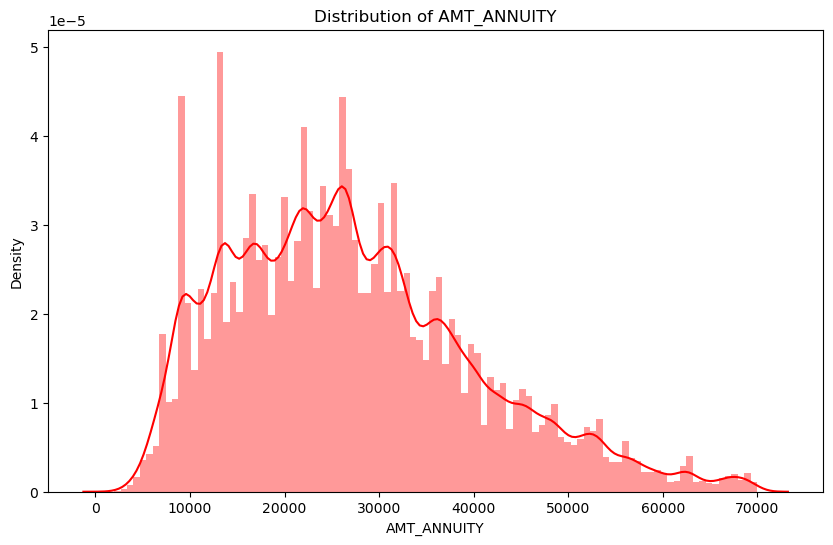

In [54]:
plot_dist('AMT_ANNUITY','red')

Observation
- This plot is a right skewed distrubution
- More clients have high credit between 0 to 50000

##### AMT_GOODS_PRICE

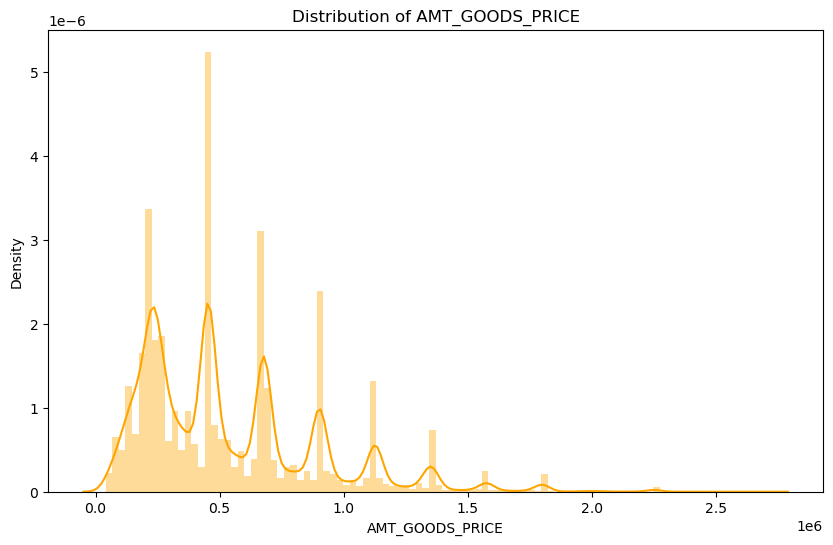

In [55]:
plot_dist('AMT_GOODS_PRICE','orange')

Observations
- Also a right skewed distribution
- We can observe that with increase in goods price the density decreases 

##### CUST_AGE --- Number of days fro birth

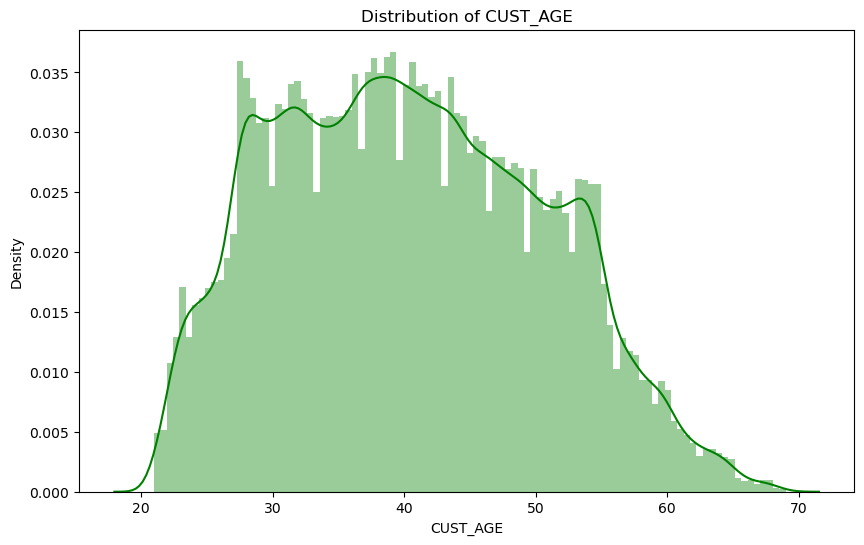

In [56]:
plot_dist('CUST_AGE','green')

Observation
- We see a sharp increase in clients from ages 20-30 and an exponential drop from ages 55-70. 

##### MONTHS_EMPLOYED --- Number of days employed

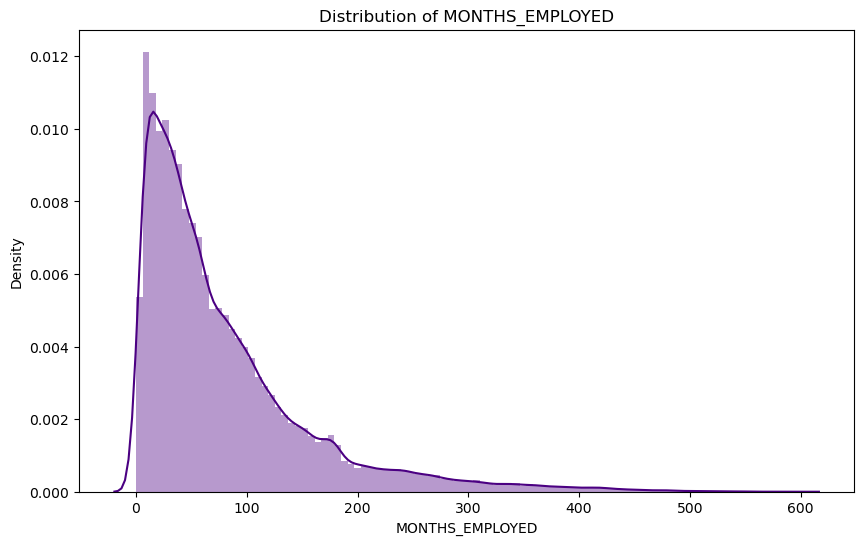

In [57]:
plot_dist('MONTHS_EMPLOYED','indigo')

Observation
- The plot is right skewed
- The peak values in the beginning indicates credit being given for newly employed clients.
- It also suggests that the more months the client has been employed, the less likely they have a loan. 

##### MONTHS_REGISTRATION 

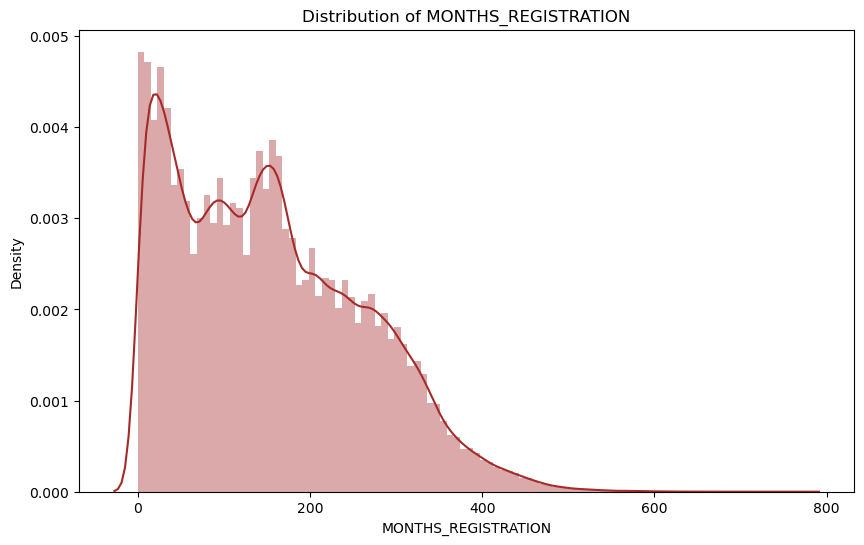

In [58]:
plot_dist('MONTHS_REGISTRATION','brown')

Observation
- There are more number of clients that had changed their regestration recently than the ones that have not

##### MONTHS_ID_PUBLISH

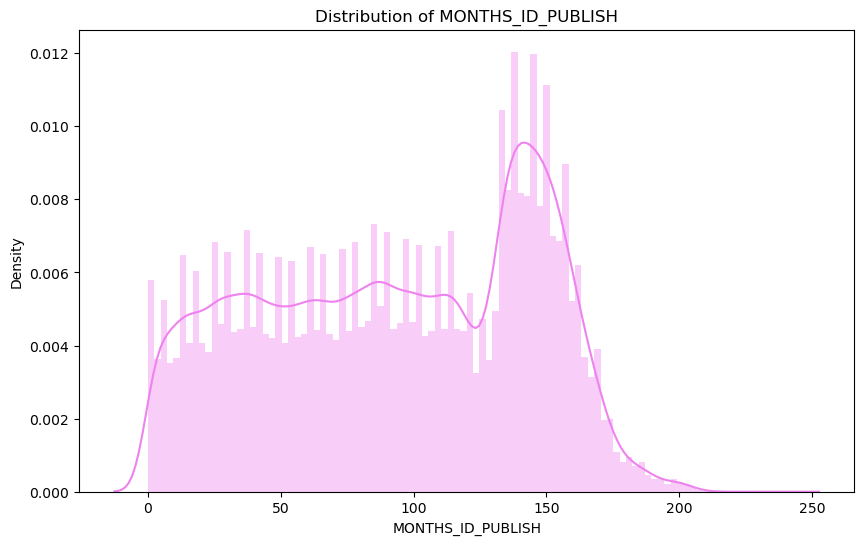

In [59]:
plot_dist('MONTHS_ID_PUBLISH','violet')

Observation
- We see a peak at 150 months indicating there is a change in identity published.

##### Comparision of target0 ant target1 with interval values

<Figure size 640x480 with 0 Axes>

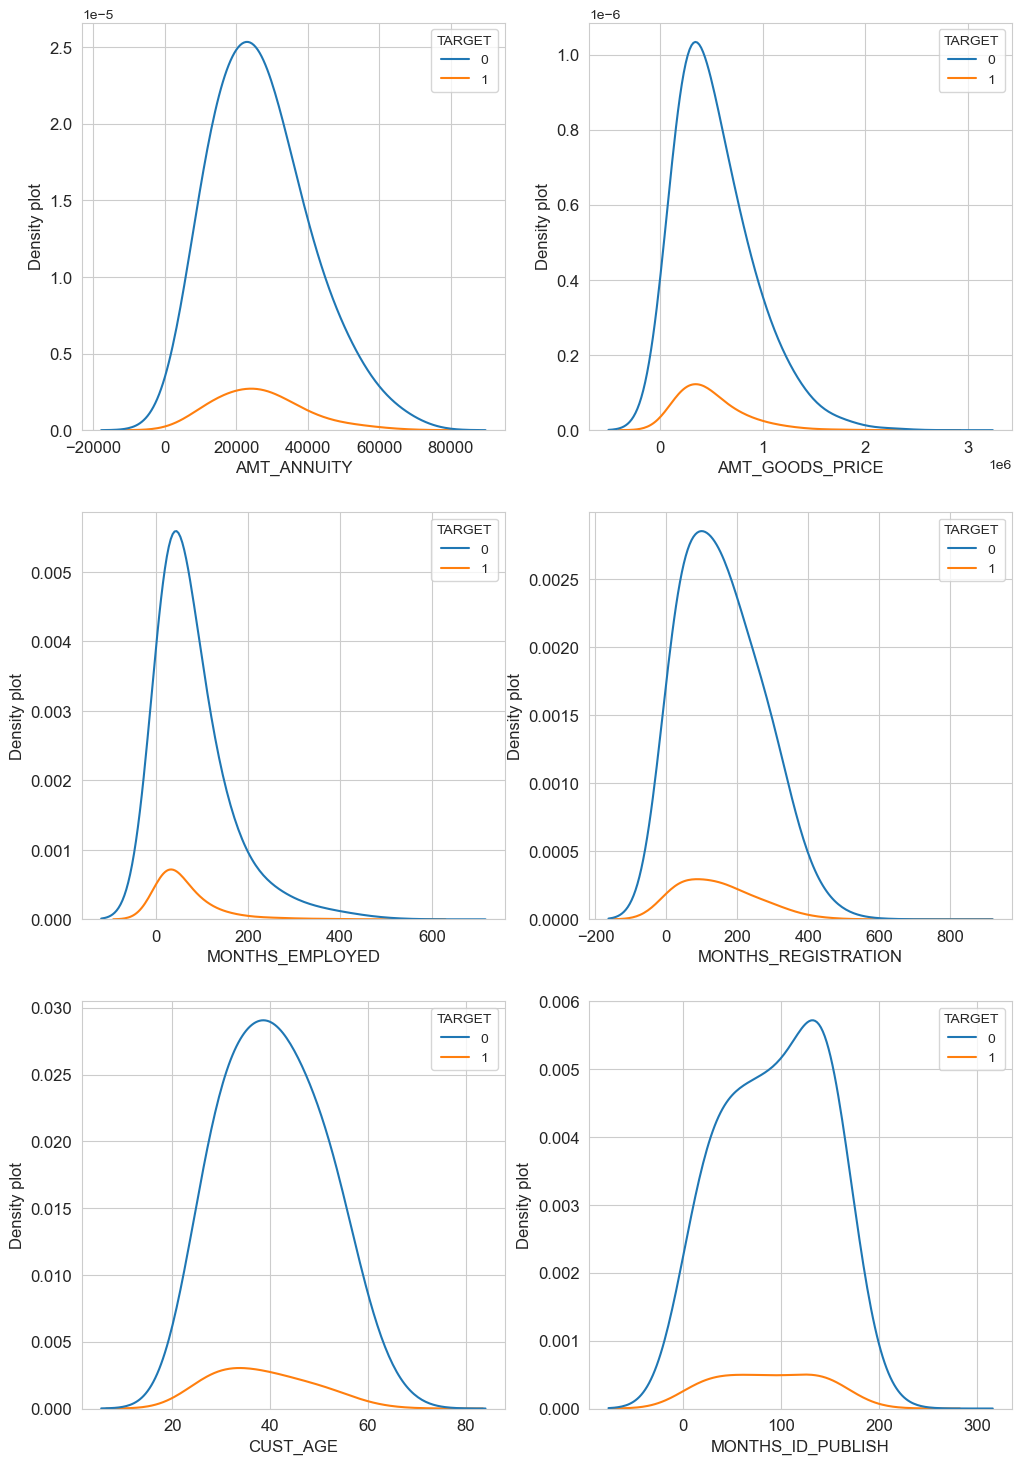

In [60]:
cmp_target = ['AMT_ANNUITY','AMT_GOODS_PRICE','MONTHS_EMPLOYED', 'MONTHS_REGISTRATION','CUST_AGE','MONTHS_ID_PUBLISH']
plot_dist_comp(cmp_target,nrow=3)

Observation
- Density plots of target1 follows the skewness of density plot of target0 for all the above columns

#####  REG_REGION_NOT_LIVE_REGION,  REG_REGION_NOT_WORK_REGION

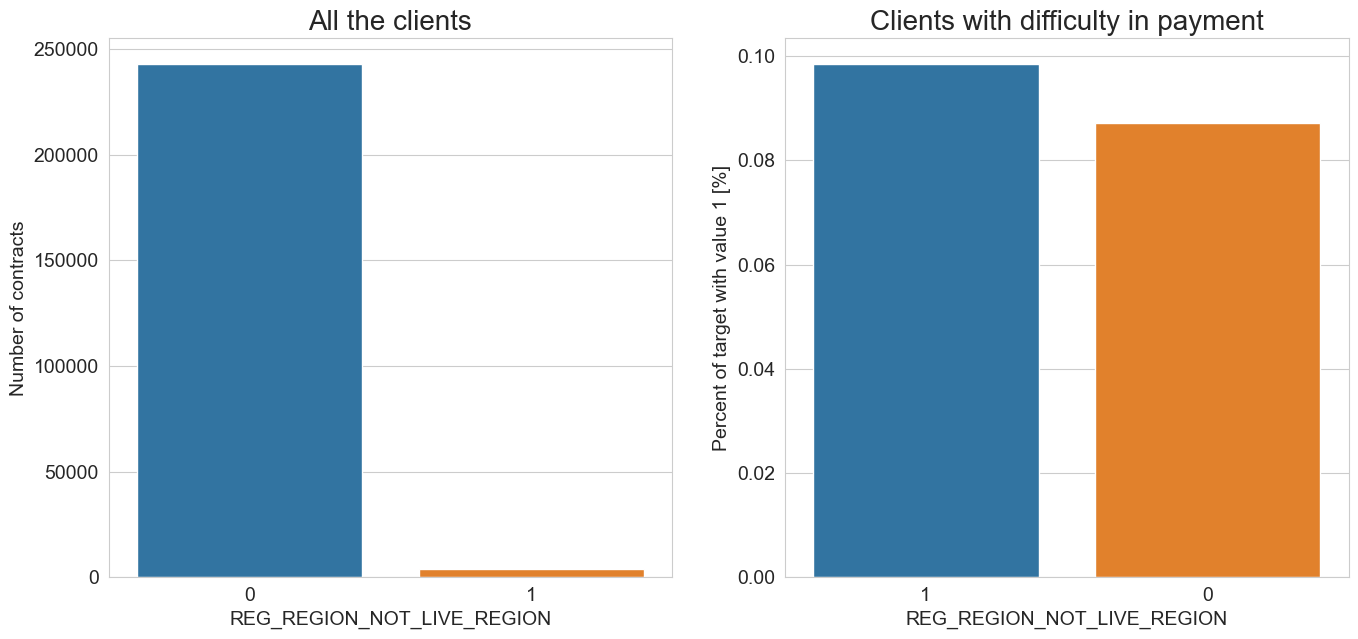

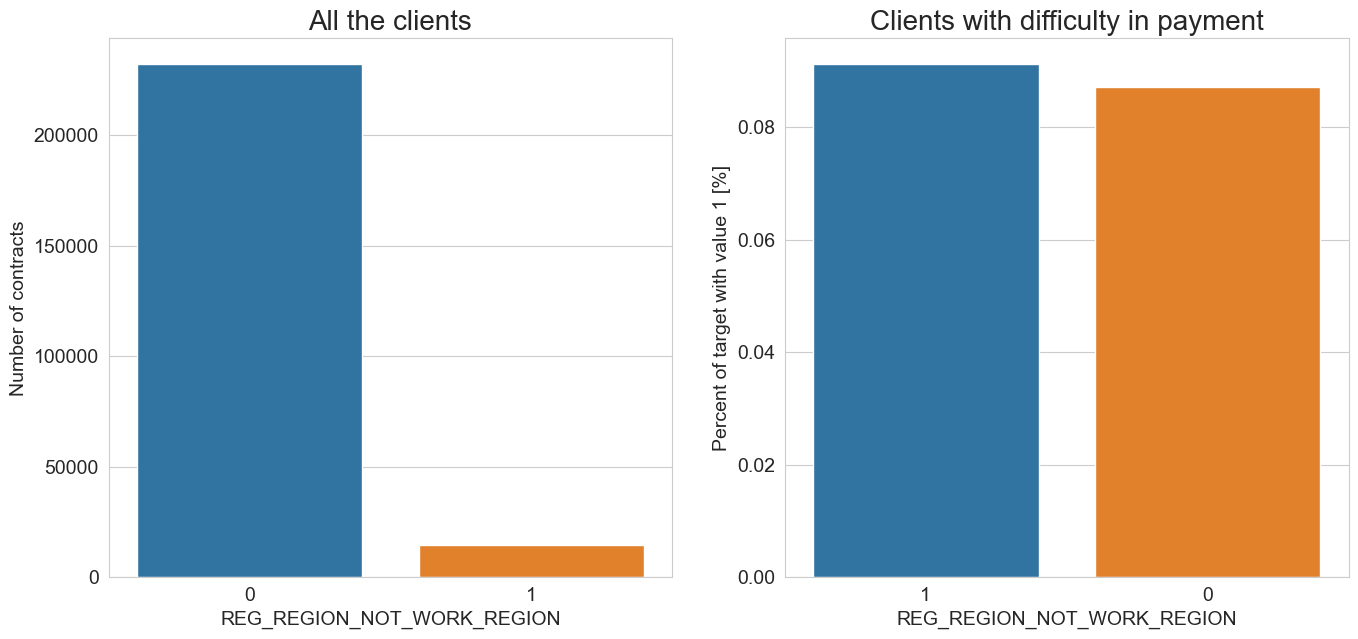

In [61]:
plot_target(appData,'REG_REGION_NOT_LIVE_REGION')
plot_target(appData,'REG_REGION_NOT_WORK_REGION')

Observation
- Both in not live and not work region, very few clients are registered
- The percentage of clients not repaying the loan is slightly higher than the percentage of oan repayment

#####  REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY

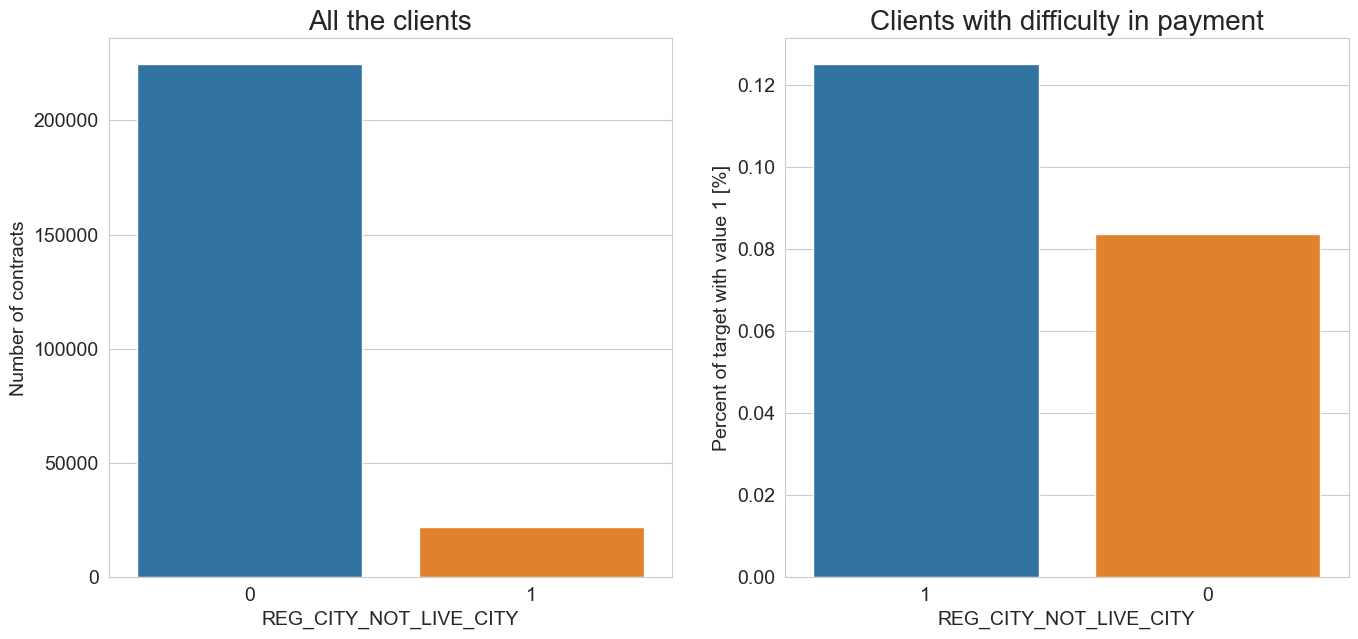

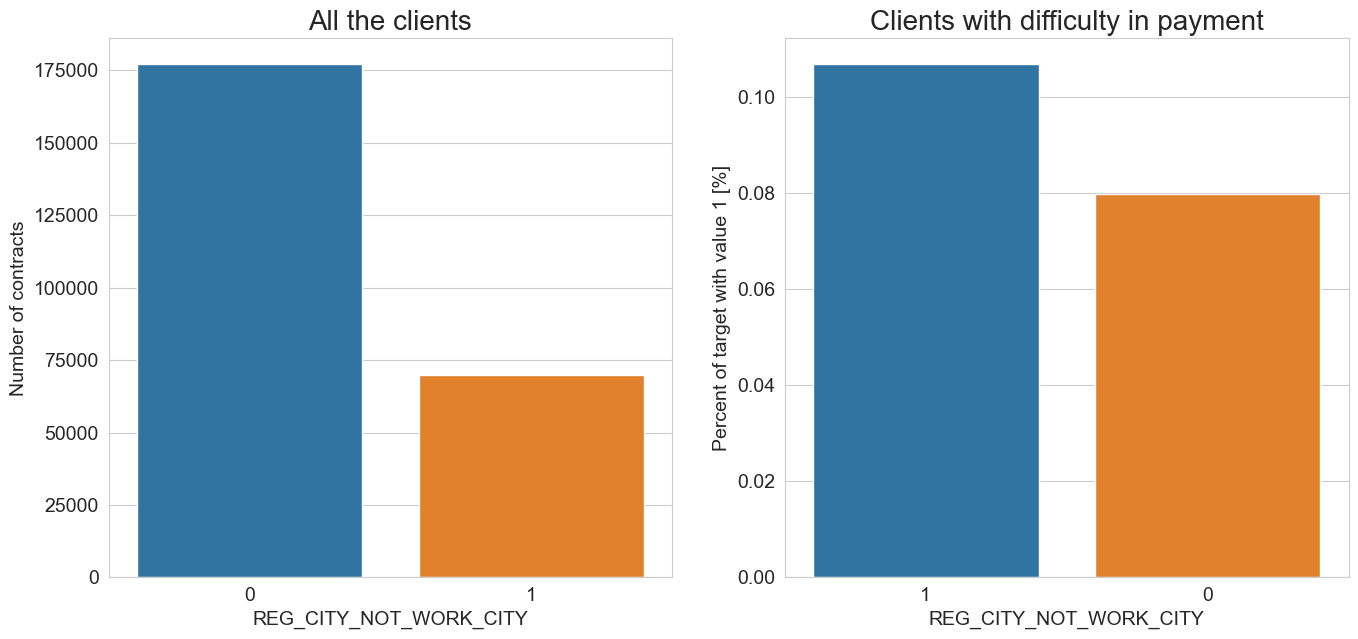

In [62]:
plot_target(appData,'REG_CITY_NOT_LIVE_CITY')
plot_target(appData,'REG_CITY_NOT_WORK_CITY')

Observation
- The clients registered in a different city than the working city or living city have higher percentage of loan non repayment

### Bivariate analysis

Bivariate analysis for Numerical - Numerical data

<Figure size 1800x1800 with 0 Axes>

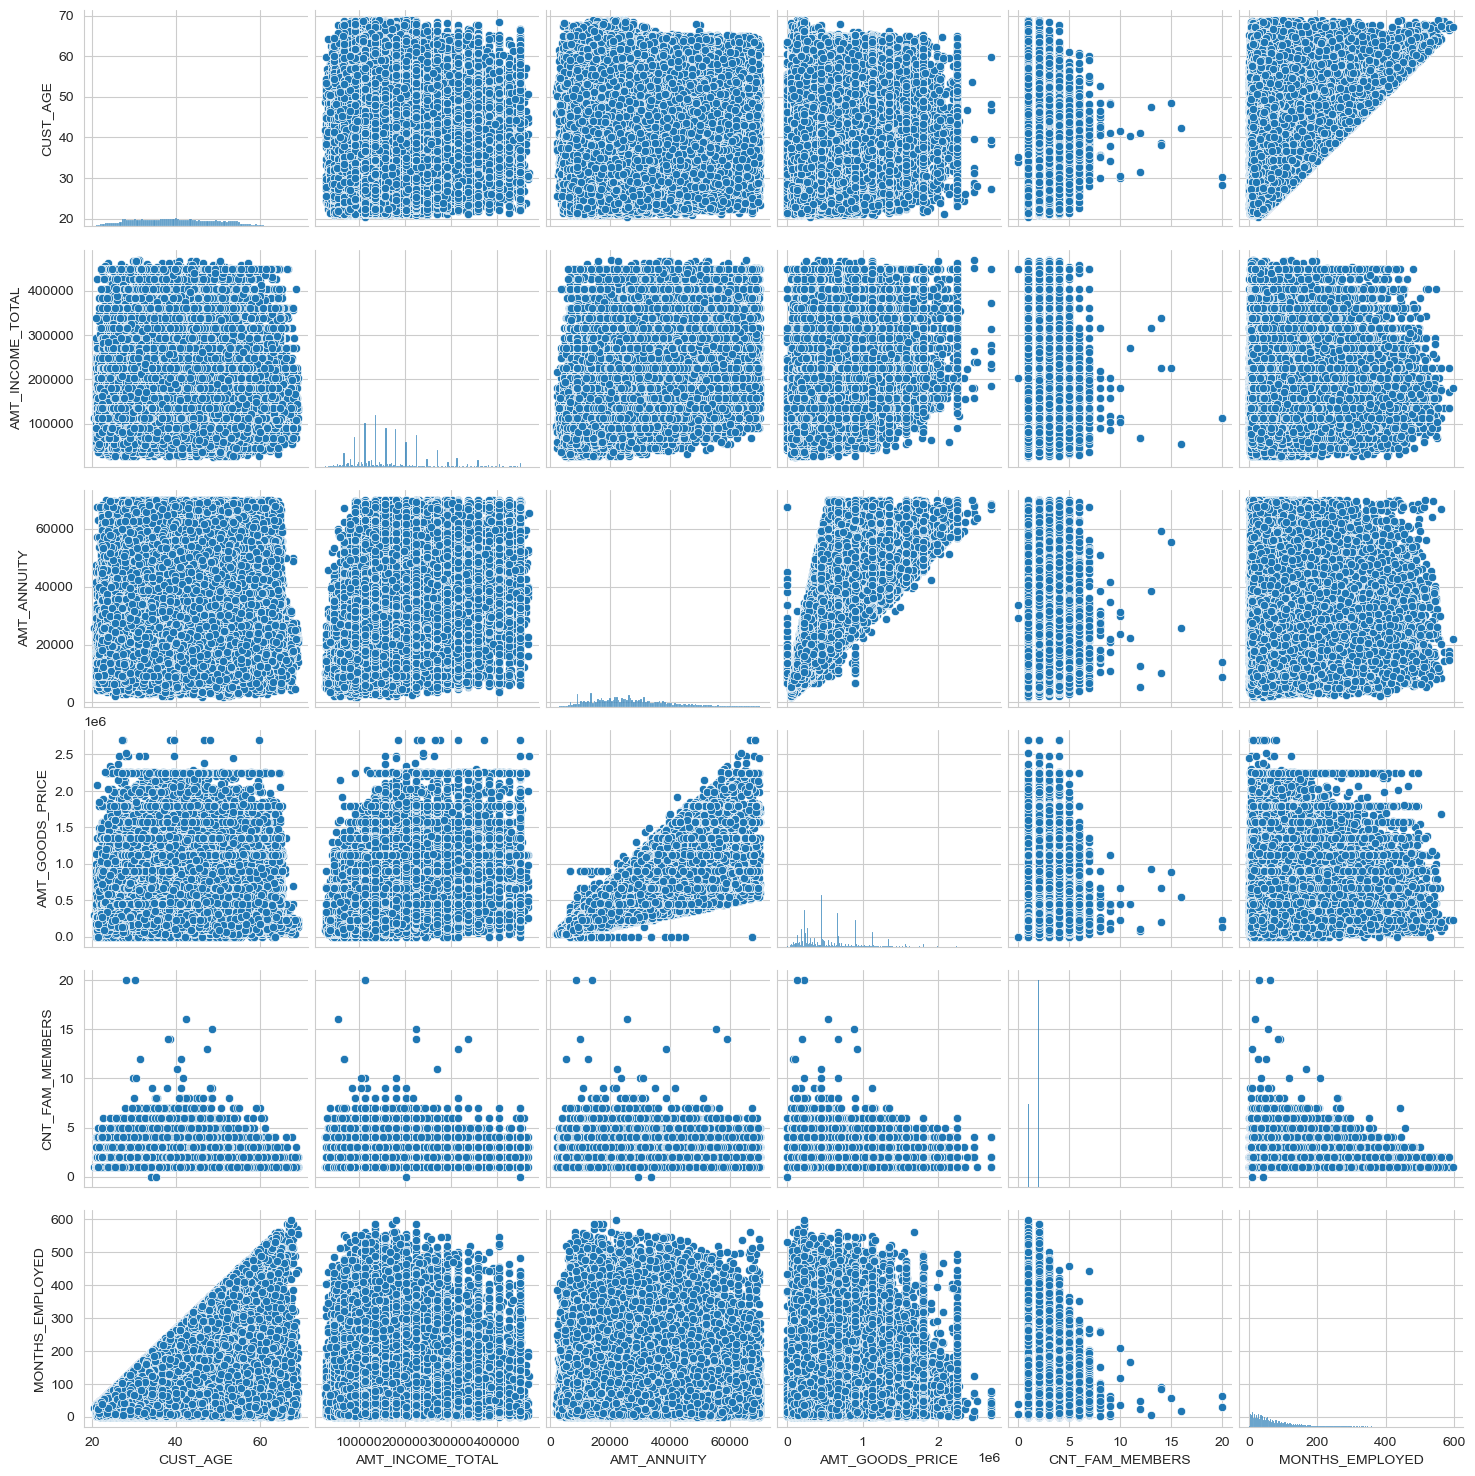

In [63]:
plt.figure(figsize=(18,18))
sns.pairplot(appData[['CUST_AGE','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','MONTHS_EMPLOYED']].fillna(0))
plt.show()

Observation
- There is a high correlation between amount annuity and amount good price.
- There is also a correlation between months employed and customer age. 

Bivarient analysis for Categorical - Categorical

In [64]:
def plot_cat_cat(df,col1,col2,horizontal=True):
    target0=df.loc[df["TARGET"]==0]
    target1=df.loc[df["TARGET"]==1]
    
    if(horizontal):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,16))
    sns.set_color_codes("pastel")
    
    hue_order_list = set(df[col2])
    order_list = set(df[col1])
   
    ax1.title.set_text('Client with payment dificulties')
    ax1.title.set_fontsize(20)
    for item in ([ ax1.xaxis.label, ax1.yaxis.label] +ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(12)
    
    sns.countplot(ax=ax1,x=col1,hue=col2,data=target1 , hue_order =hue_order_list, order = order_list)


    ax2.title.set_text('Client with No payment dificulties')
    ax2.title.set_fontsize(20)
    for item in ([ ax2.xaxis.label, ax2.yaxis.label] + ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(12)
    sns.countplot(ax=ax2,x=col1,hue=col2,data=target0, hue_order =hue_order_list, order = order_list)
    plt.show()
    

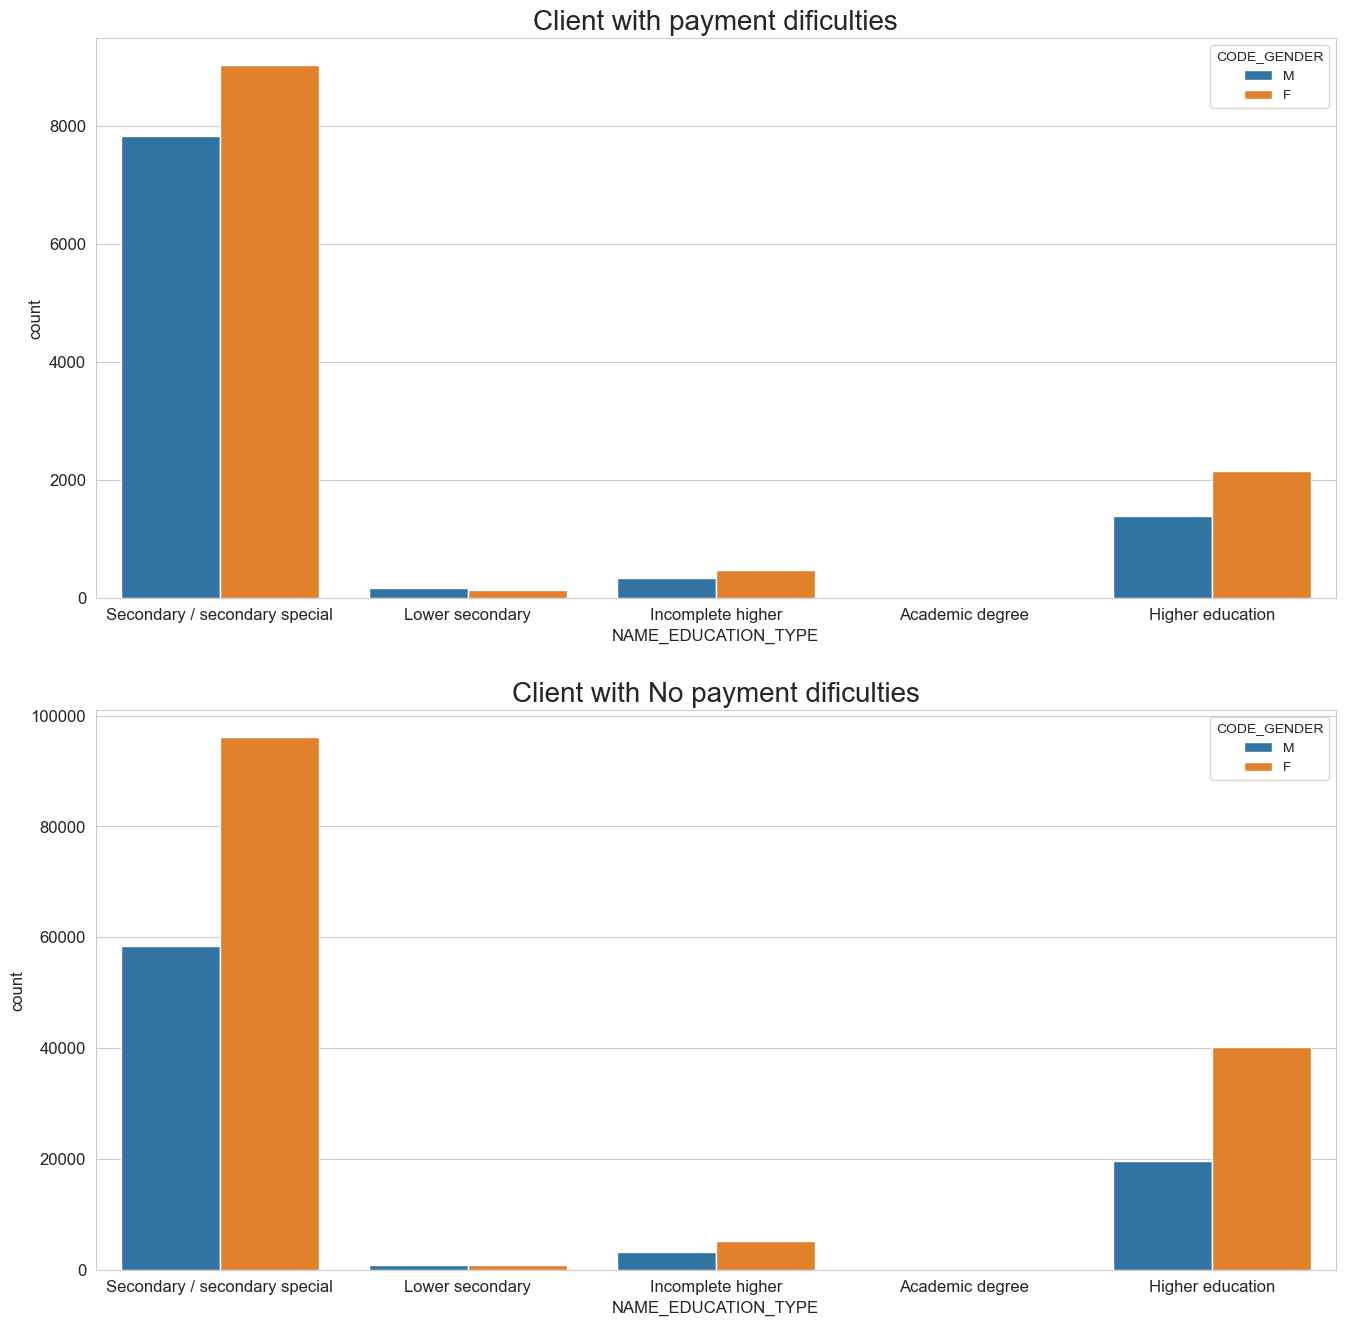

In [65]:
plot_cat_cat(appData,'NAME_EDUCATION_TYPE','CODE_GENDER',False)

Observation
- Both male and female clients with secondary education type have the highest loan non repayment count. 
- In loan repayments, male clients count is almost half of female clients count.


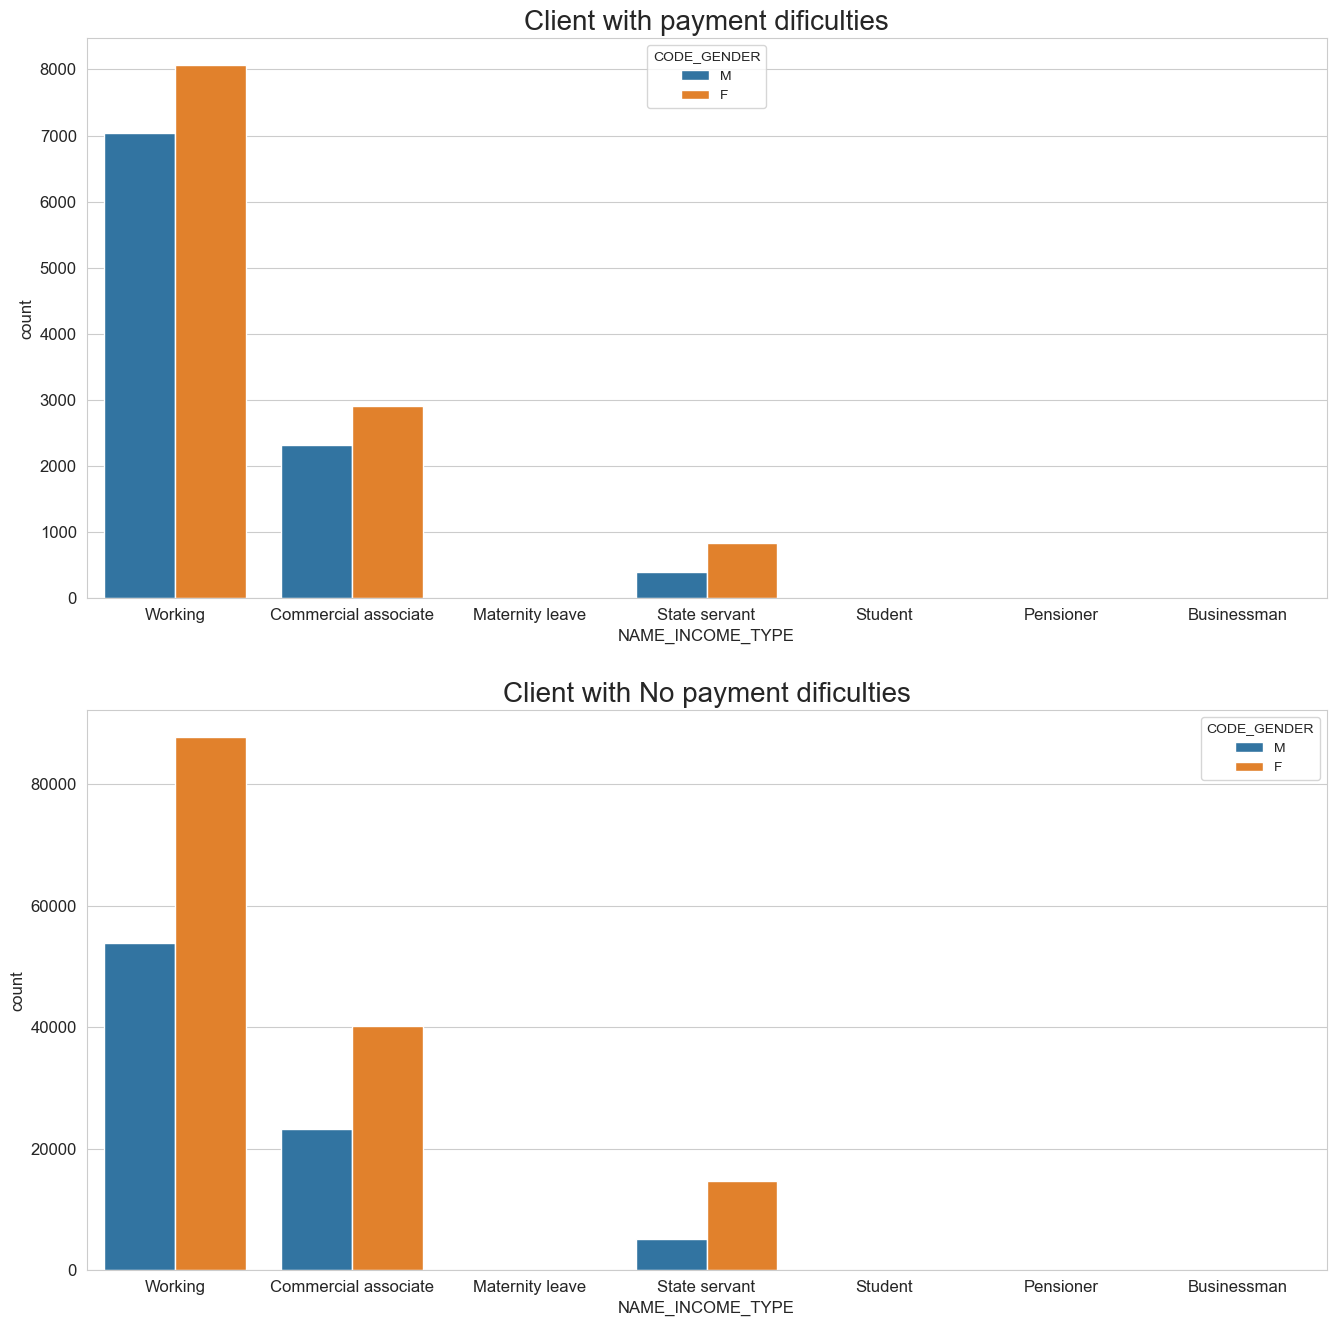

In [66]:
plot_cat_cat(appData, 'NAME_INCOME_TYPE','CODE_GENDER',False)

Observation
- For income type working, commercial associate, and State Servant the number of credits are higher than other i.e. Maternity leave.
- For this Females are having more number of credits than male.
- Less number of credits for income type Maternity leave.
- There is no bar for student , pensioner and Businessman which means they don’t do any late payments.

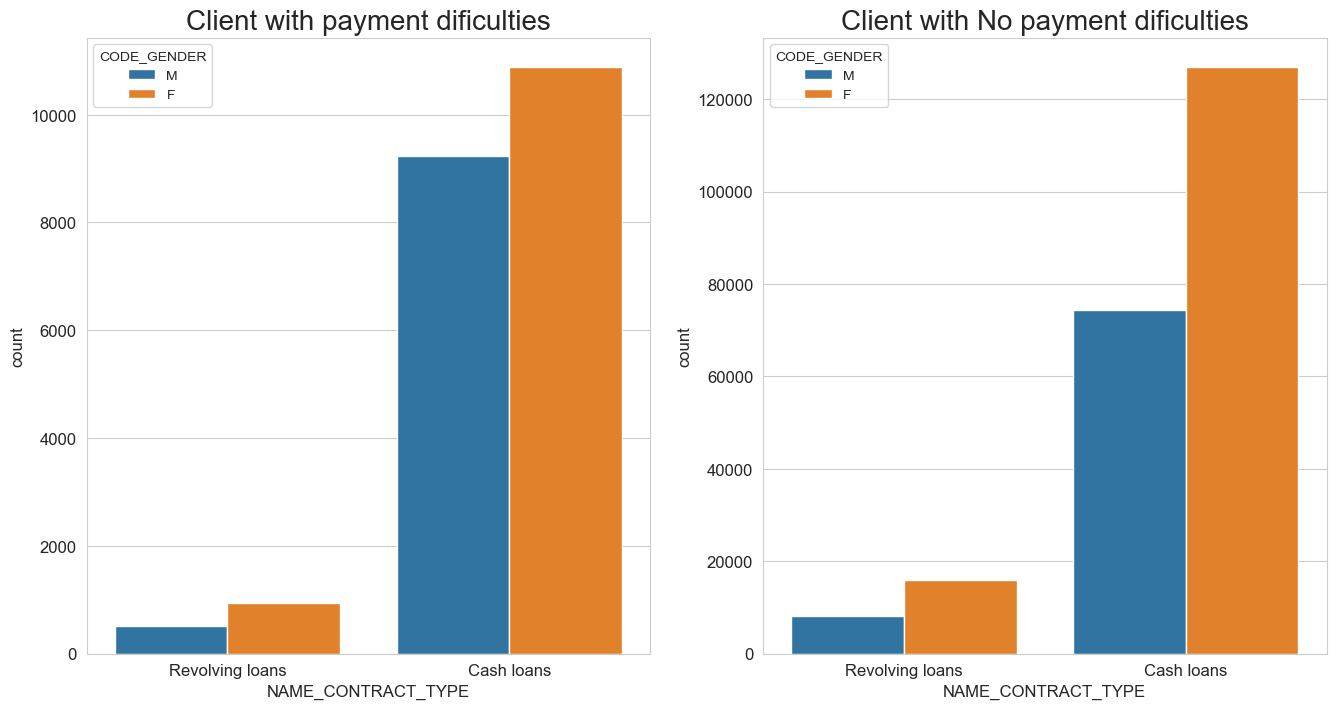

In [67]:
plot_cat_cat(appData, 'NAME_CONTRACT_TYPE','CODE_GENDER')

Observation
- Cash loans of male clients without payment difficulties is half of female clients without payment difficulties.
- Cash loans are the more availed by both clients with and without patment difficulties when compared to revolving loans.

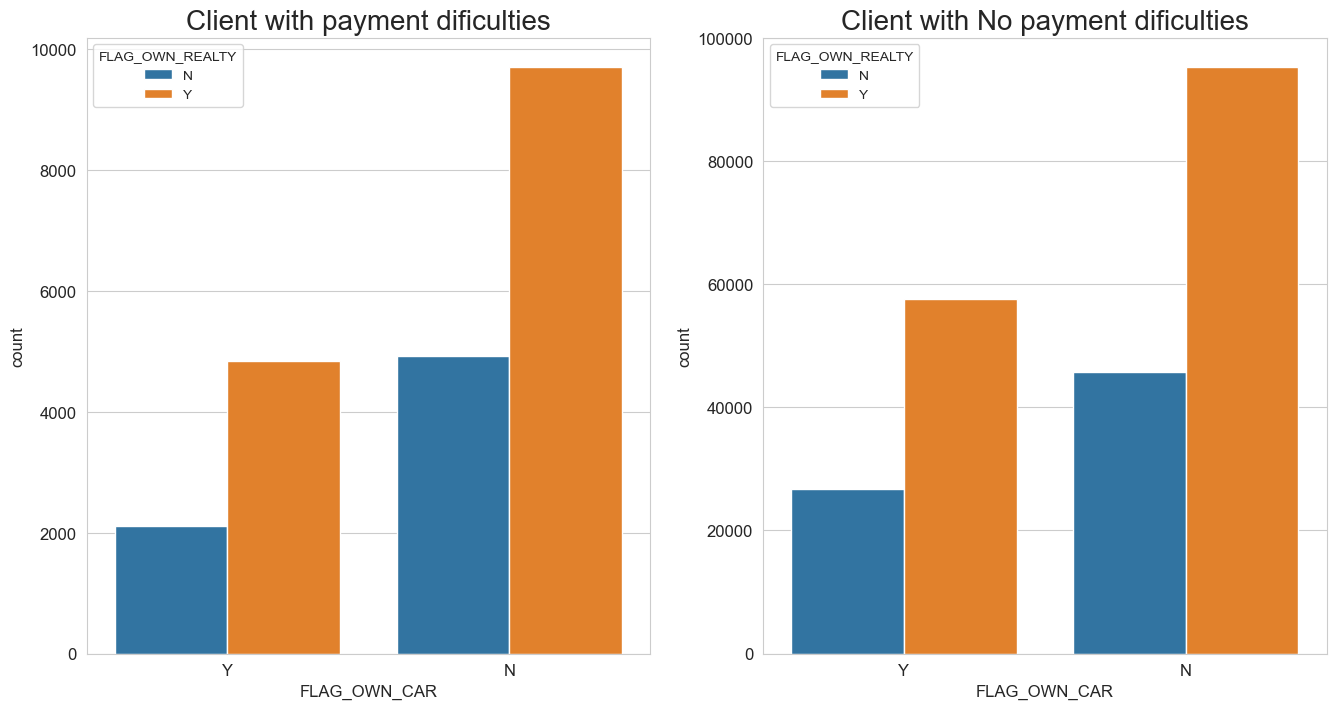

In [68]:
plot_cat_cat(appData, 'FLAG_OWN_CAR','FLAG_OWN_REALTY')

Observation
- There is no observable pattern difference between clients with and without payment difficulties

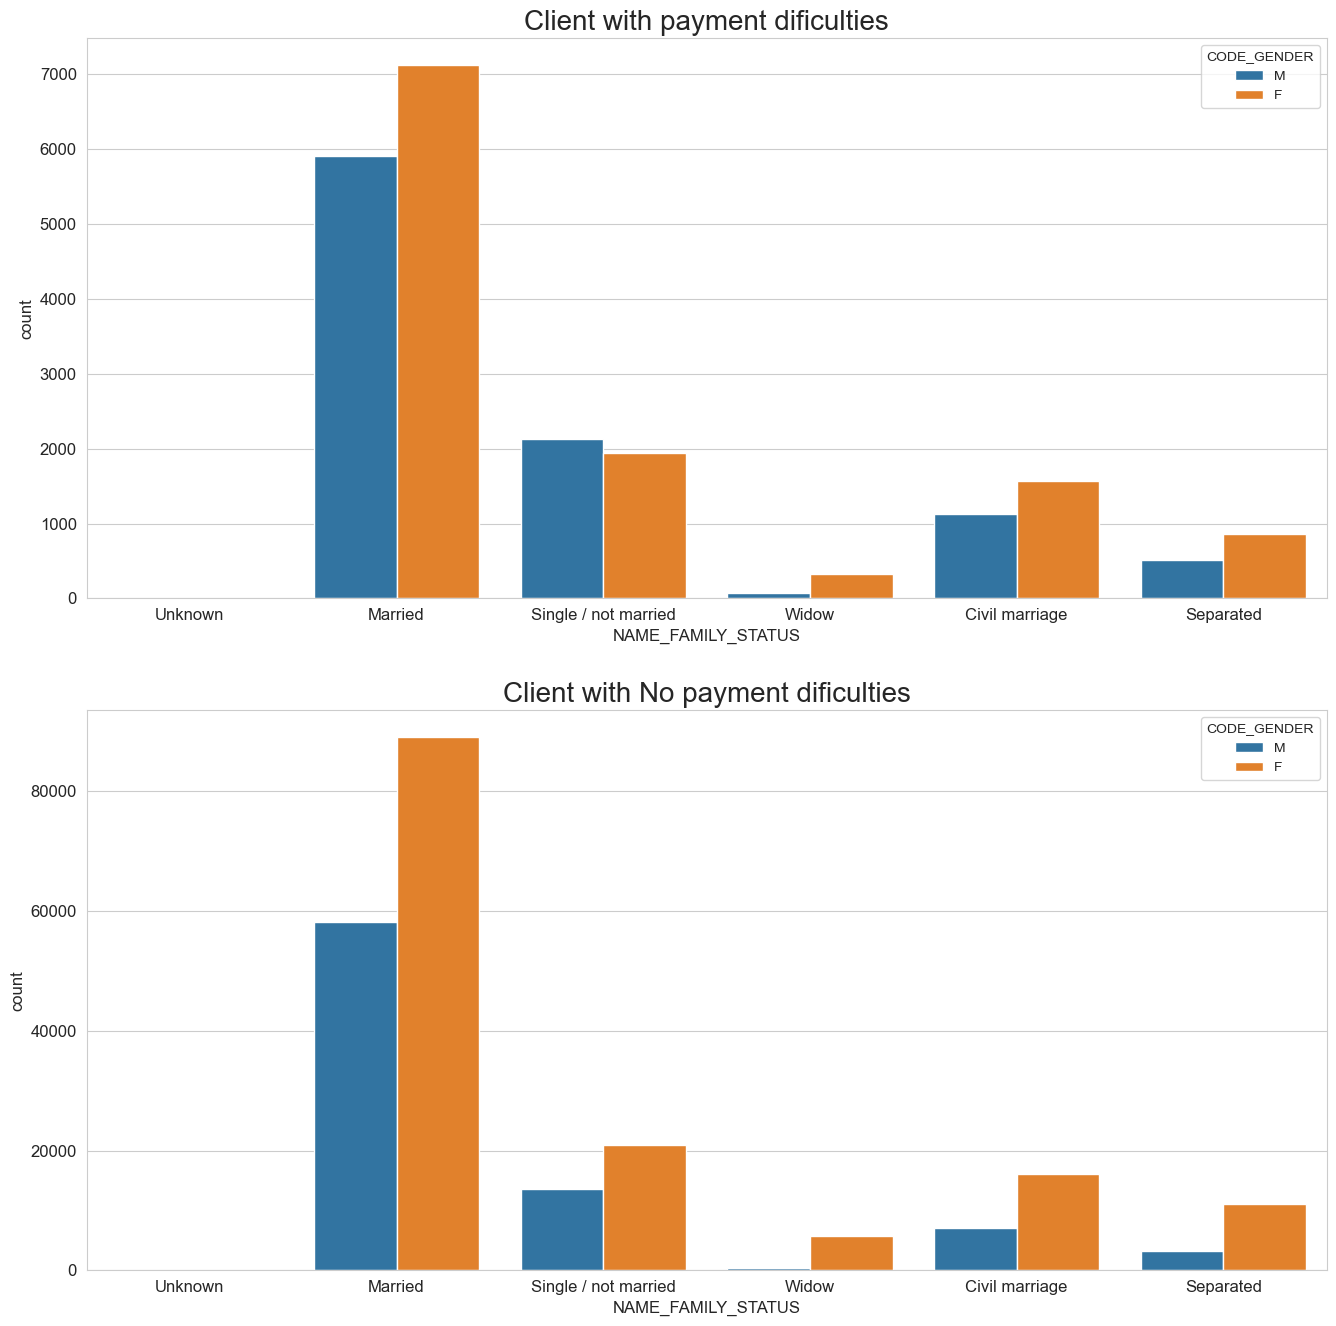

In [69]:
plot_cat_cat(appData, 'NAME_FAMILY_STATUS','CODE_GENDER',False)

Observation
- Widow clients have more payment difficulties when compared to other clients. 
- Female clients are more than male clients irrespective of their family status and whether they have payment difficulty or not
- Married female clients have more payment difficulties than married male clients

In [70]:
def plot_cat_nume(df,col1,col2):
    s =sns.catplot(x=col1, y=col2, hue="TARGET", kind="box", data=df)
    s.fig.set_size_inches(16,8)
    plt.show()

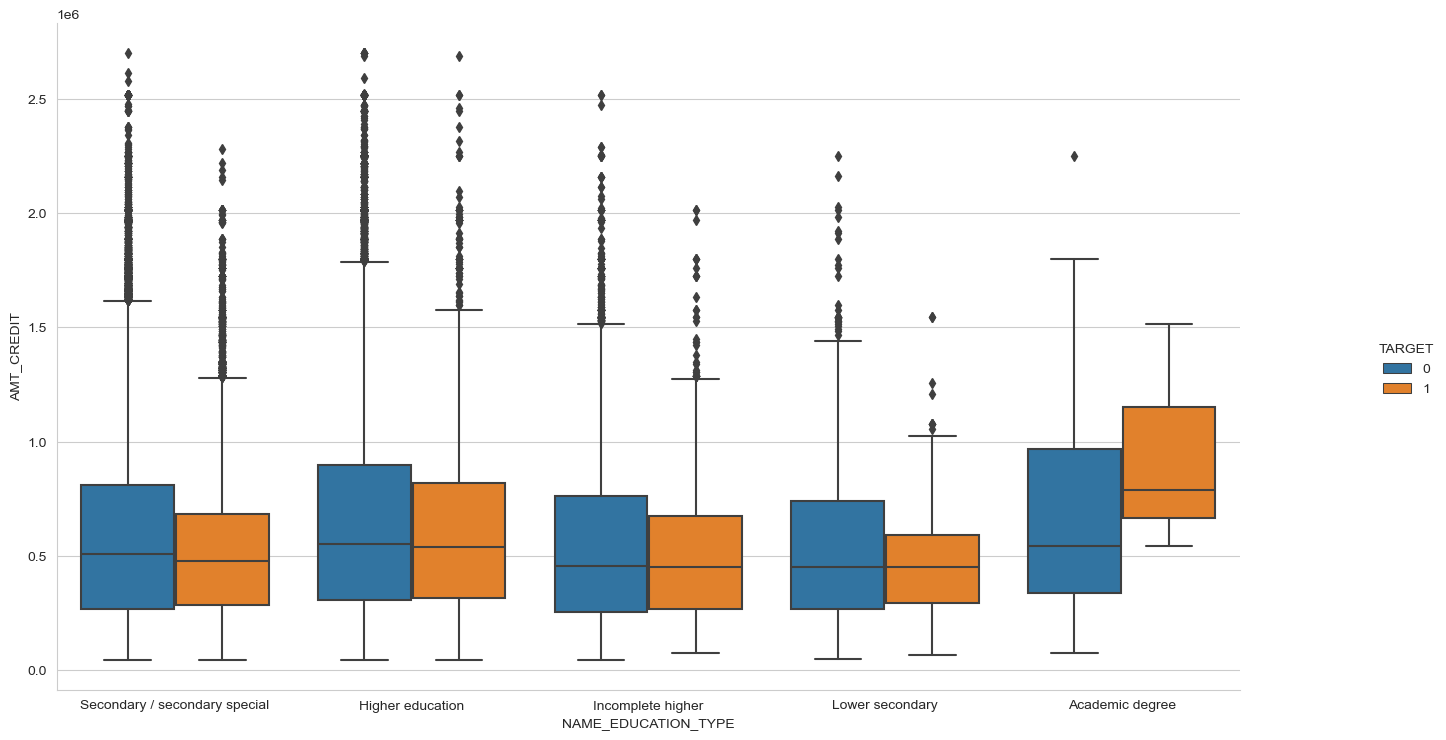

In [71]:
plot_cat_nume(appData, "NAME_EDUCATION_TYPE","AMT_CREDIT")

Observation
- The mean amount credited is almost same among all the education types for clients with and without payment difficulties 
- Clients with higher education seem to have high credit
- Clients with Academic degree seem to have more difficulties for higher credit amount

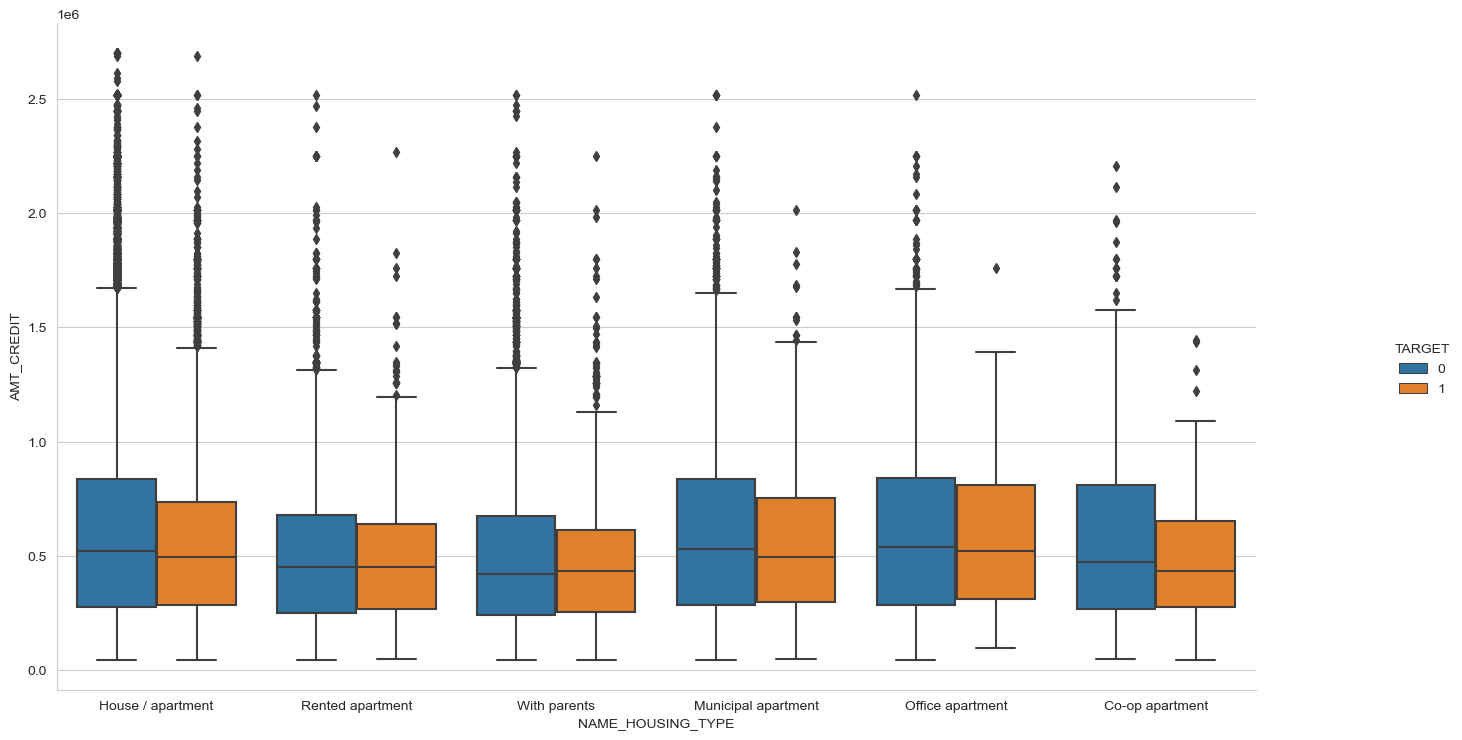

In [72]:
plot_cat_nume(appData,"NAME_HOUSING_TYPE","AMT_CREDIT")

Observation
- All the clients have almost the same mean credit per housing type irrespective of the difficulty

## Correlations 

Steps to get top 10 correlations

1. Apply absolute function , as positive or negitive just denote if therey are directly or inversly proportional , end of the day the magnitude is what considered for the describing how closely they are related.
2. To arrange the correlation in order , matrix is not the best form , so let's un stack it
3. and then sort them in Descending order.
4. We have no intrest with variable correlation with itself and in varibles that have no correlation, so let's drop them
5. Every pair will have two combinations, hence to get top 10, we have to pick top 20

In [73]:
# columns like lone id are irrelevent hence ignoring those columns 
appData_corr = appData.loc[:, ~appData.columns.isin(['SK_ID_CURR'])].corr()

In [74]:
def corr_plot_and_top(df, plt_heading ,top=10 ):
    df_corr = df.corr(method='spearman')
    plt.figure(figsize = (20,20))
    sns.heatmap(df_corr, vmax=0.3, square=True)
    plt.title(plt_heading,fontdict ={'fontsize': 20,'fontweight' : 10})
    plt.show()
    correlation_appData = df_corr.abs().unstack().sort_values(ascending=False).dropna()
    correlation_appData = correlation_appData[correlation_appData != 1.0]
    print(correlation_appData.head(2*top))

Now the above Heat map being mapped for a dataset with so many rows , it's hard to read it just like that 
So lets apply some filtering over the correlation matrix itself to obtain results.


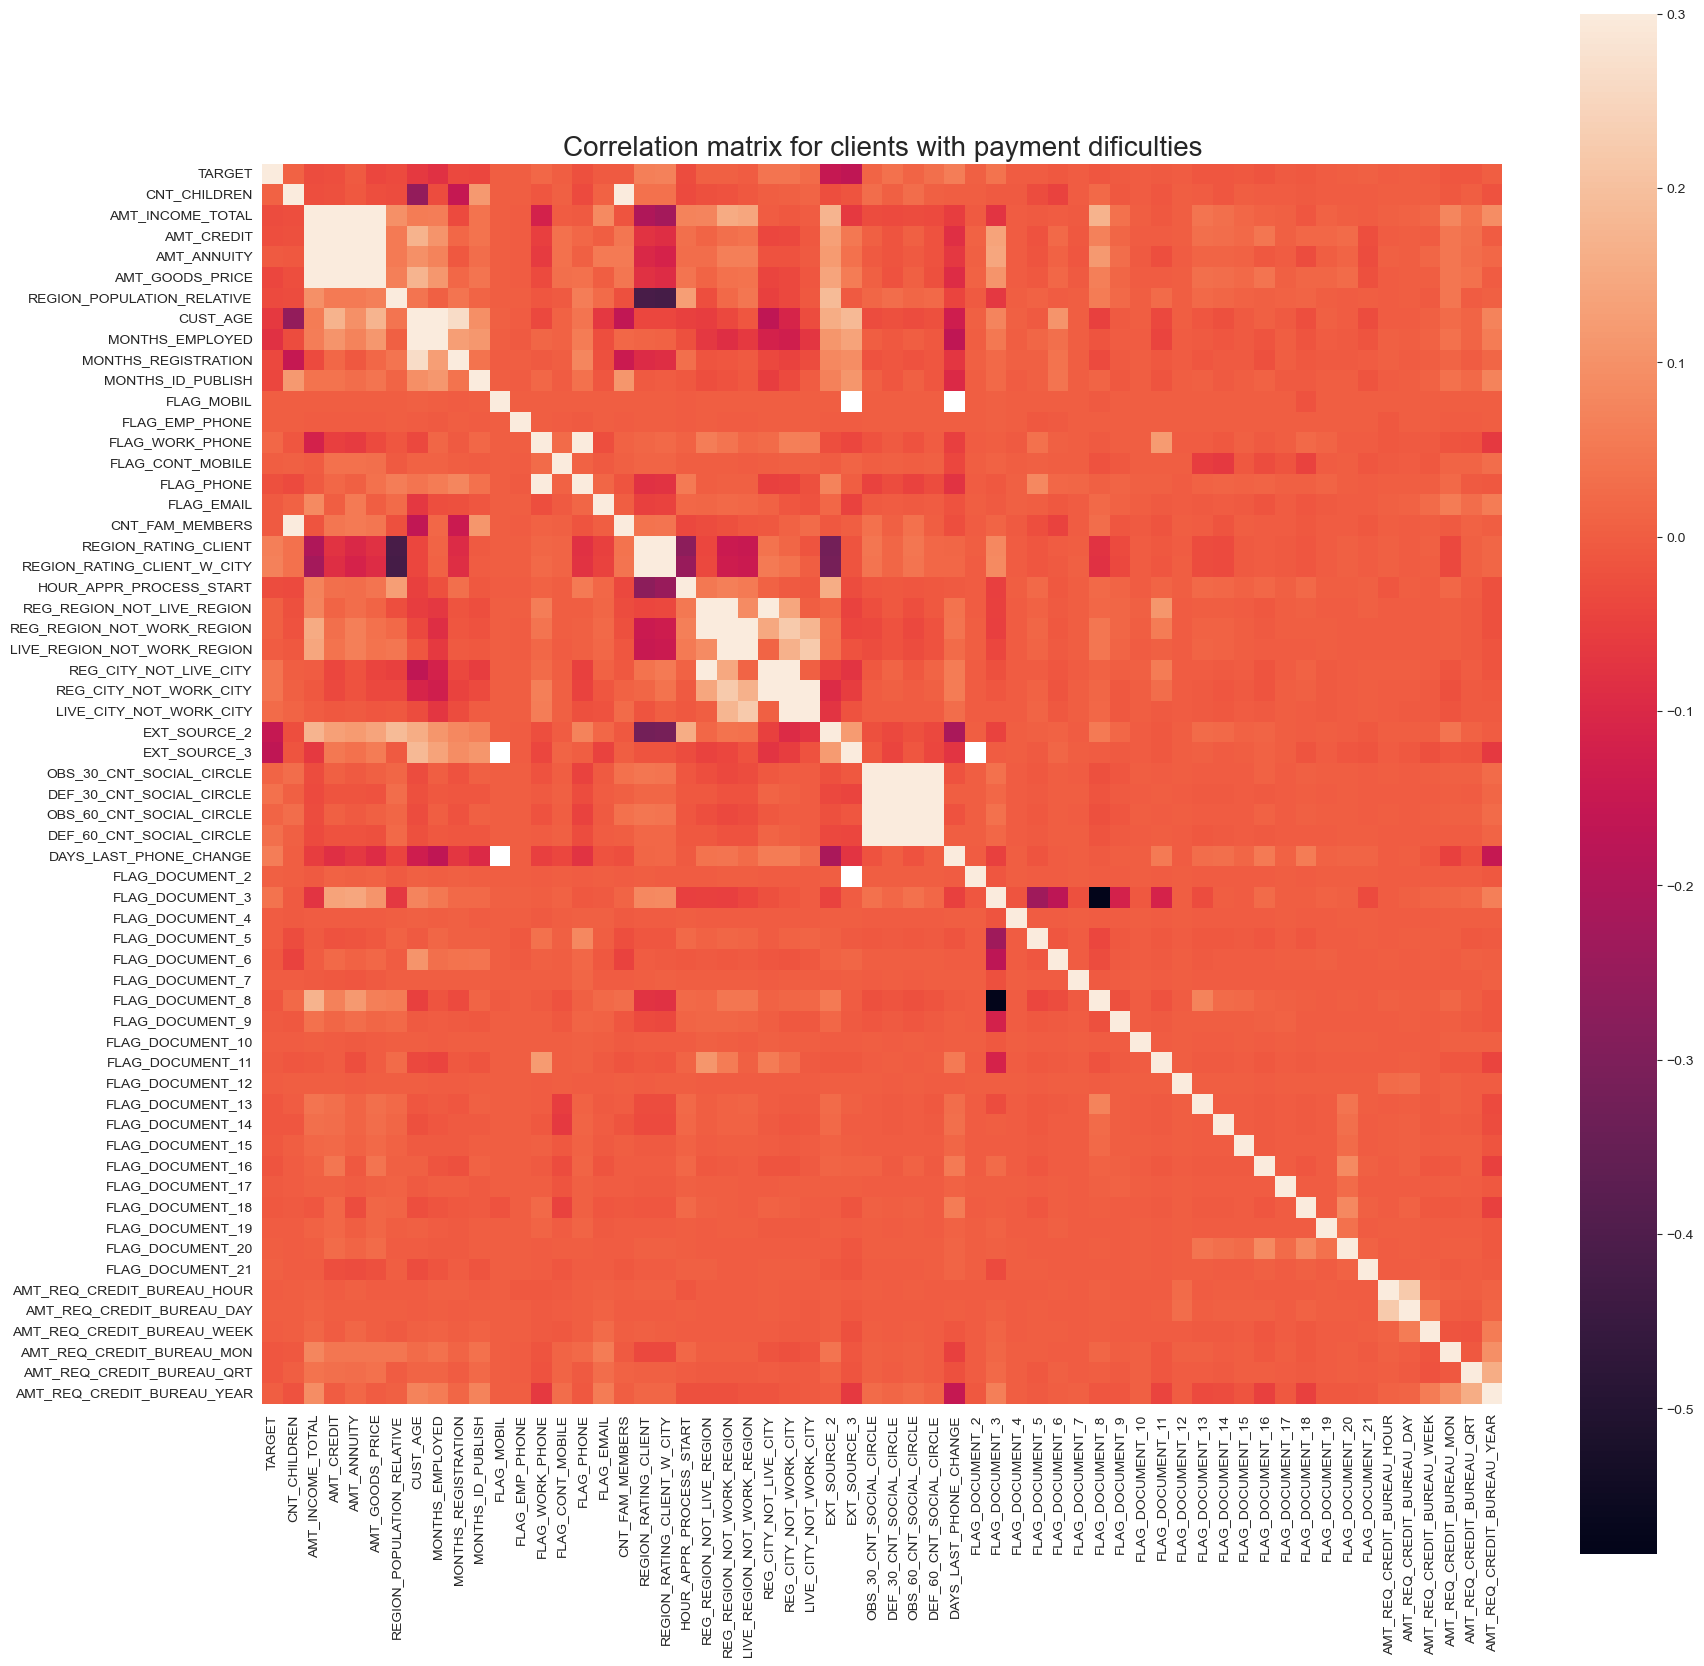

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.997336
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.997336
AMT_GOODS_PRICE              AMT_CREDIT                     0.983948
AMT_CREDIT                   AMT_GOODS_PRICE                0.983948
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949345
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.949345
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860168
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860168
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.847609
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.847609
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.845506
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.845506
AMT_ANNUITY                  AMT_CREDIT                     0.821838
AMT_CREDIT                   AMT_ANNUITY                    0.821838
AMT_ANNUITY                  AMT_G

In [75]:
corr_plot_and_top(appData.loc[:, ~appData.columns.isin(['SK_ID_CURR'])],"Correlation matrix for clients with payment dificulties",10)

Observation
- The top 10 correlations are 
1. OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE ,
2. AMT_GOODS_PRICE              AMT_CREDIT  ,
3. REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    ,
4. REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION , 
5. CNT_FAM_MEMBERS              CNT_CHILDREN ,
6. DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE,
7. AMT_ANNUITY                  AMT_CREDIT ,
8. AMT_ANNUITY                  AMT_GOODS_PRICE,
9. LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  ,
10. FLAG_DOCUMENT_3              FLAG_DOCUMENT_8.

- From top to bottom the correlation decreses


## Previous application data analysis

In [76]:
# Loading previous application data 
prevData.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

#### Data manipulation and cleaning for previous application data

In [77]:
#to drop the colunms that have more than 50% percentage of null values
prevData = drop_columns_with_nulls(prevData,50)

columns with missing rows count greater than 50% is : 4
list of columns getting dropped ::  ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT']

 
 Final shape of dataset : (1670214, 33)


In [78]:
# Renaming of columns which are similar in application data
prevData.rename(columns={'AMT_CREDIT': 'AMT_CREDIT_PREV','AMT_ANNUITY': 'AMT_ANNUITY_PREV'}, inplace=True)

In [79]:
# Changing the negative values in the columns which start with DAYS to positive values

filter_col = [col for col in prevData if col.startswith('DAYS')]
prevData[filter_col]= abs(prevData[filter_col])
prevData.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans          1730.430          17145.0          17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved             73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0            42.0                      300.0           42.0              37.0                        0.0
1     2802425      108129         Cash loans         25188.615         607500.0         679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved            164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0           134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans         15060.735         112500.0         136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved            301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0           271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans         47041.335         450000.0         470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved            512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0           482.0                      152.0          182.0             177.0                        1.0
4     1784265      202054         Cash loans         31924.395         337500.0         404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused            781  Cash through the bank                 HC              NaN         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high                 NaN             NaN                        NaN            NaN               NaN                        NaN

In [80]:
# Replace XAP and XNA with NAN
prevData=prevData.replace('XNA', np.NaN)
prevData=prevData.replace('XAP', np.NaN)

In [81]:
look_values_and_null(prevData)

2030495    5.987257e-07
1035848    5.987257e-07
1526498    5.987257e-07
2148893    5.987257e-07
2437429    5.987257e-07
               ...     
2811649    5.987257e-07
1221292    5.987257e-07
2780117    5.987257e-07
2194001    5.987257e-07
2418762    5.987257e-07
Name: SK_ID_PREV, Length: 1670214, dtype: float64 , has  0 null values 

187868    4.610188e-05
265681    4.370697e-05
173680    4.310825e-05
242412    4.071335e-05
206783    4.011462e-05
              ...     
135285    5.987257e-07
311960    5.987257e-07
427136    5.987257e-07
241434    5.987257e-07
191629    5.987257e-07
Name: SK_ID_CURR, Length: 338857, dtype: float64 , has  0 null values 

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
NaN                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64 , has  346 null values 

NaN          2.228667e-01
2250.000     1.907839e-02
11250.000    8.366593e-03
6750.000     8.048070e-03
9000.000     7.481676e-03
                 ...     
3794

NaN           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64 , has  517215 null values 

Cash                              0.171230
POS household with interest       0.157837
POS mobile with interest          0.132121
Cash X-Sell: middle               0.086146
Cash X-Sell: low                  0.077983
Card Street                       0.067406
POS industry with interest        0.059174
POS household without interest    0.049639
Card X-Sell                       0.048247
Cash Street: high                 0.035707
Cash X-Sell: high                 0.035505
Cash Street: middle               0.020751
Cash Street: low                  0.020257
POS mobile without interest       0.014419
POS other with interest           0.014297
POS industry without interest     0.007545
POS others without interest       0.001530
NaN                               0.000207
Name: PRODUCT_COMBINATION, dtype: float64 , 

In [82]:
prevData.describe()

SK_ID_PREV    SK_ID_CURR  AMT_ANNUITY_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06      1.297979e+06     1.670214e+06     1.670213e+06     1.284699e+06             1.670214e+06            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05      1.595512e+04     1.752339e+05     1.961140e+05     2.278473e+05             1.248418e+01            9.964675e-01   8.806797e+02      3.139511e+02  1.605408e+01       342340.056543    15949.224065               35163.363265   78152.730207      83505.775017                   0.332570
std    5.325980e+05  1.028148e+05      1.478214e+04     2.927798e+05     3.185746e+05     3.153966e+05             3.334028e+00            5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01        88413.495220    72007.270877              106405.950190  148833.342466     152484.418802                   0.471134
min    1.000001e+06  1.000010e+05      0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00             0.000000e+00            0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00            2.000000        2.000000                   0.000000       2.000000          2.000000                   0.000000
25%    1.461857e+06  1.893290e+05      6.321780e+03     1.872000e+04     2.416050e+04     5.084100e+04             1.000000e+01            1.000000e+00   2.800000e+02     -1.000000e+00  6.000000e+00       365243.000000      475.000000                 257.000000     455.000000        447.000000                   0.000000
50%    1.923110e+06  2.787145e+05      1.125000e+04     7.104600e+04     8.054100e+04     1.123200e+05             1.200000e+01            1.000000e+00   5.810000e+02      3.000000e+00  1.200000e+01       365243.000000      921.000000                 741.000000    1155.000000       1171.000000                   0.000000
75%    2.384280e+06  3.675140e+05      2.065842e+04     1.803600e+05     2.164185e+05     2.340000e+05             1.500000e+01            1.000000e+00   1.300000e+03      8.200000e+01  2.400000e+01       365243.000000     1825.000000                1735.000000    2418.000000       2501.000000                   1.000000
max    2.845382e+06  4.562550e+05      4.180581e+05     6.905160e+06     6.905160e+06     6.905160e+06             2.300000e+01            1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

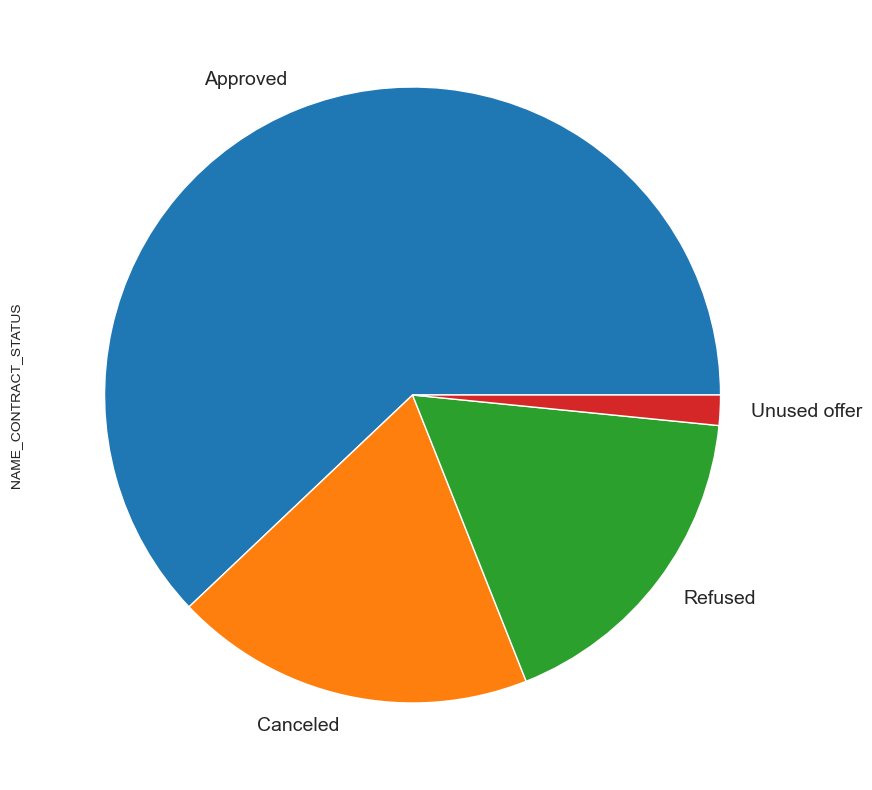

In [83]:
plt.figure(figsize=(10,10))
prevData["NAME_CONTRACT_STATUS"].value_counts().plot.pie(textprops={'fontsize': 14})
plt.show();

### Merging the data

The dataframe prevData contains information about all previous applications for Home Credit loans of clients who have loans in the sample. There is one row for each previous application related to loans in our data sample. **SK_ID_CURR** is the key connecting appData with prevData.

Let's merge appData with prevData.

In [84]:
# Creating a new dataframe with SK_ID_CURR, TARGET columns from appData
appData_new=appData[['SK_ID_CURR','TARGET']]
appData_new

SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307504      456248       0
307506      456251       0
307508      456253       0
307509      456254       1
307510      456255       0

[246860 rows x 2 columns]

In [85]:
# Merging appData_new with prevData on basis of SK_ID_CURR,TARGET
appData_merge=appData_new.merge(prevData, on='SK_ID_CURR', how='inner')

In [86]:
appData_merge.shape

(1118771, 34)

In [87]:
appData_merge.head()

SK_ID_CURR  TARGET  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0      100002       1     1038818     Consumer loans          9251.775         179055.0         179055.0         179055.0                   SATURDAY                        9                           Y                       1                    NaN             Approved            606                    NaN                NaN             NaN              New              Vehicles            POS               NaN                    Stone               500       Auto technology         24.0       low_normal      POS other with interest            365243.0           565.0                      125.0           25.0              17.0                        0.0
1      100003       0     1810518         Cash loans         98356.995         900000.0        1035882.0         900000.0                     FRIDAY                       12                           Y                       1                    NaN             Approved            746                    NaN                NaN   Unaccompanied         Repeater                   NaN           Cash            x-sell  Credit and cash offices                -1                   NaN         12.0       low_normal             Cash X-Sell: low            365243.0           716.0                      386.0          536.0             527.0                        1.0
2      100003       0     2636178     Consumer loans         64567.665         337500.0         348637.5         337500.0                     SUNDAY                       17                           Y                       1                    NaN             Approved            828  Cash through the bank                NaN          Family        Refreshed             Furniture            POS               NaN                    Stone              1400             Furniture          6.0           middle   POS industry with interest            365243.0           797.0                      647.0          647.0             639.0                        0.0
3      100003       0     2396755     Consumer loans          6737.310          68809.5          68053.5          68809.5                   SATURDAY                       15                           Y                       1                    NaN             Approved           2341  Cash through the bank                NaN          Family        Refreshed  Consumer Electronics            POS               NaN             Country-wide               200  Consumer electronics         12.0           middle  POS household with interest            365243.0          2310.0                     1980.0         1980.0            1976.0                        1.0
4      100004       0     1564014     Consumer loans          5357.250          24282.0          20106.0          24282.0                     FRIDAY                        5                           Y                       1                    NaN             Approved            815  Cash through the bank                NaN   Unaccompanied              New                Mobile            POS               NaN         Regional / Local                30          Connectivity          4.0           middle  POS mobile without interest            365243.0           784.0                      694.0          724.0             714.0                        0.0

### Univariate analysis for merged data

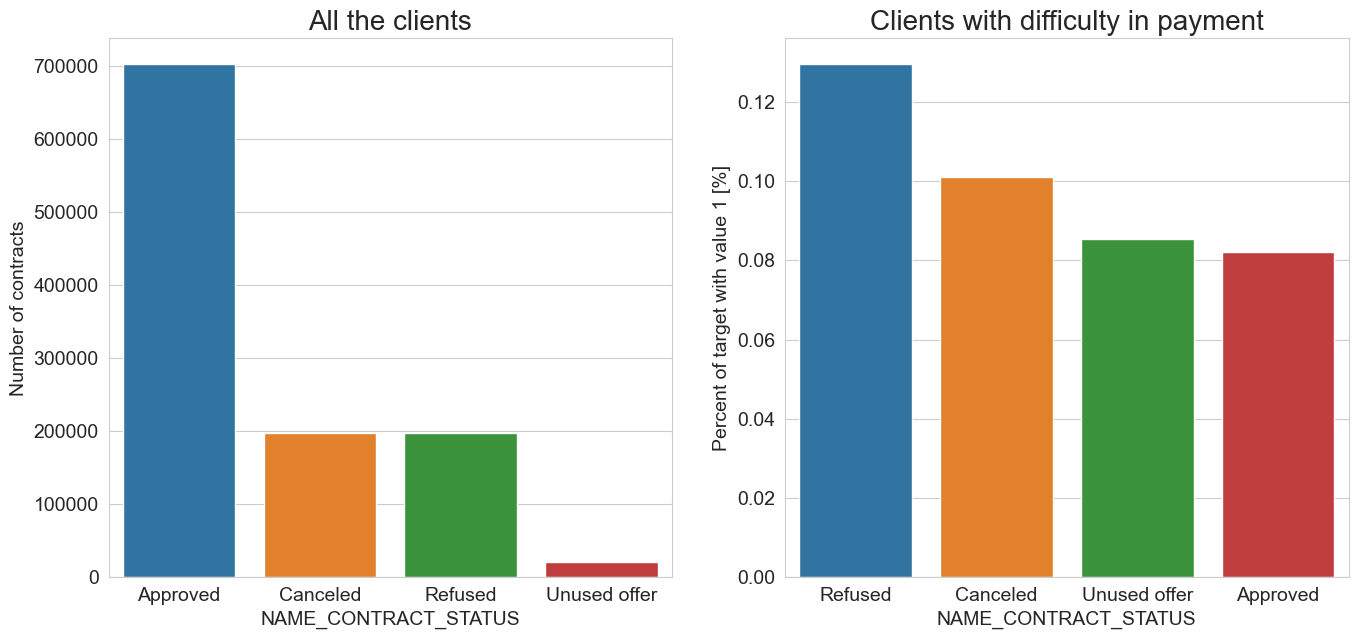

In [88]:
plot_target(appData_merge,'NAME_CONTRACT_STATUS')

Observation
- Most of the loans in previous data are approved
- Clients whose loans were refused previously have high difficulty in loan repayment when compared to clients with approved loan contracts. 

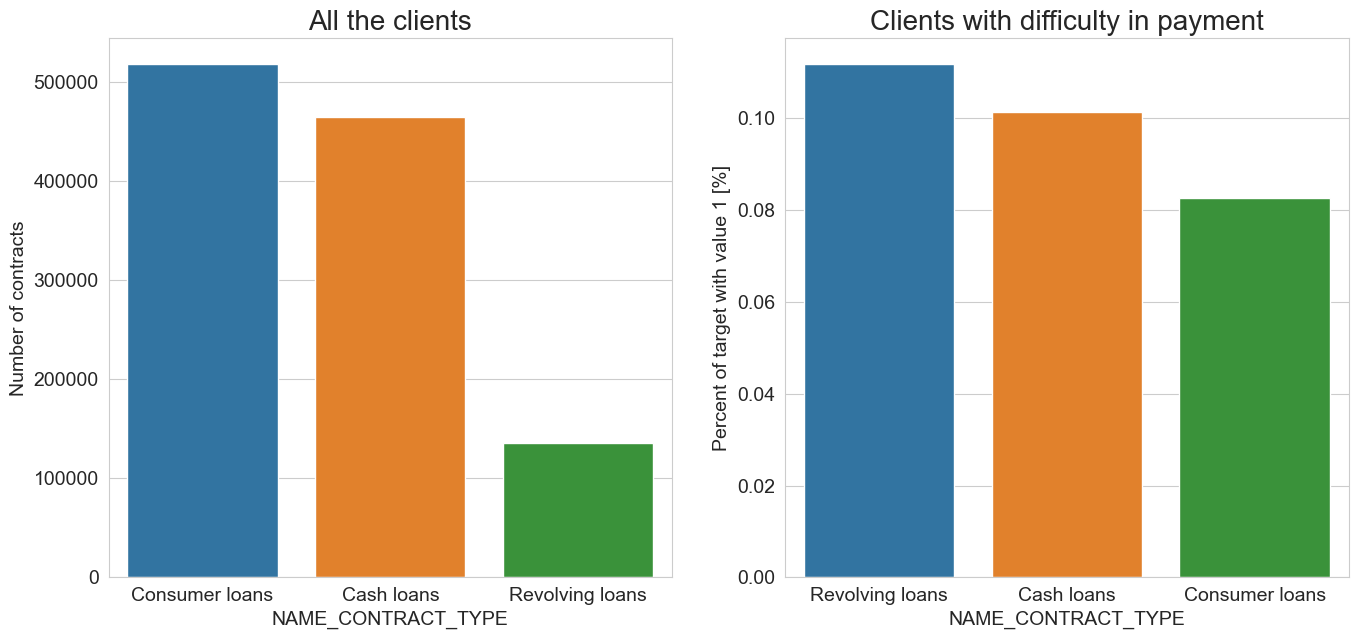

In [89]:
plot_target(appData_merge,'NAME_CONTRACT_TYPE')

Observation
- Most applications in previous applications data were of cash loans followed by consumer loans while revolving loans were the least.
- Clients with revolving loans have high percentage of difficulty in loan repayments. 

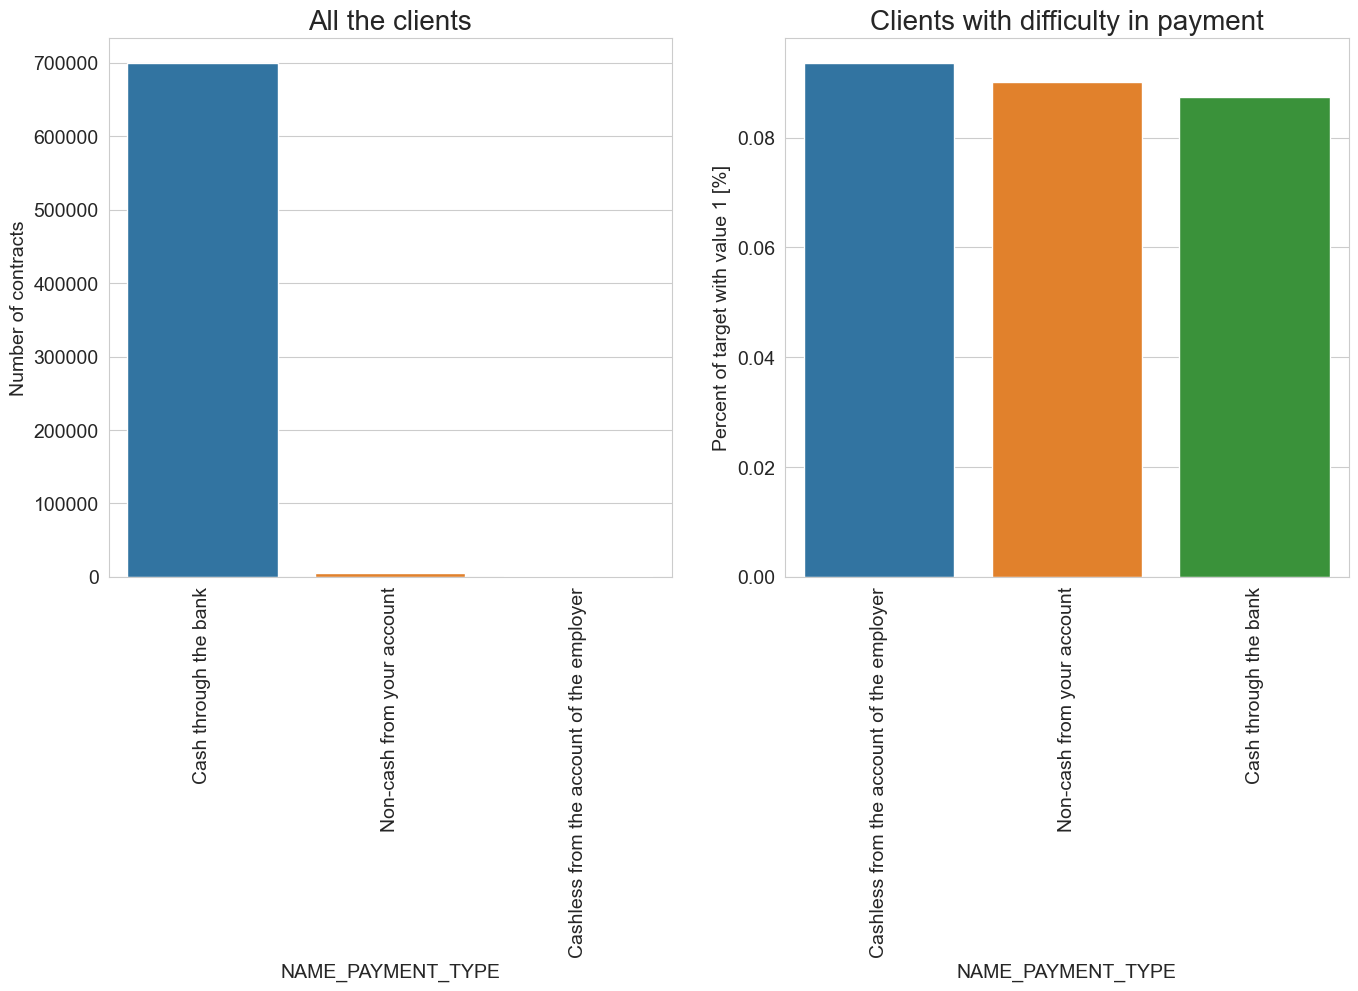

In [90]:
plot_target(appData_merge,'NAME_PAYMENT_TYPE',True)

Observation
- Most popular payment type seems to be cash through bank.
- It can be seen in the second graph that clients with all types of payment have similar percentage of difficulty in loan repayments  

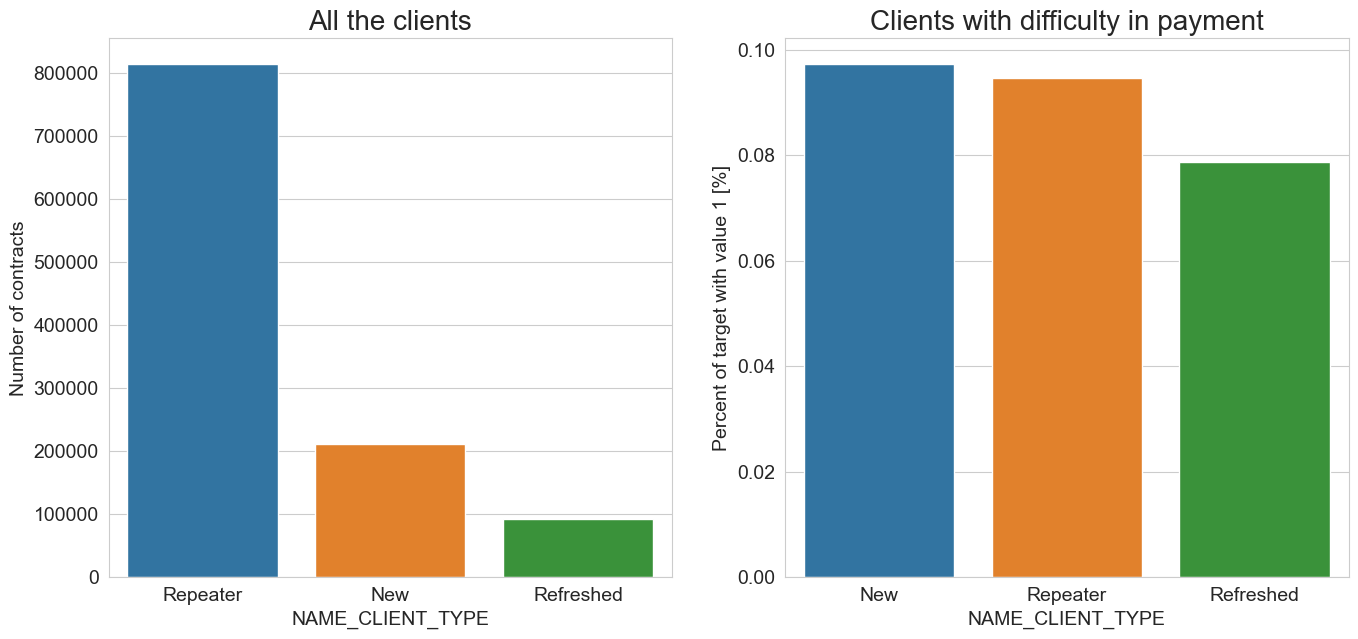

In [91]:
plot_target(appData_merge,'NAME_CLIENT_TYPE')

Observation
- Most of the clients are repeaters
- From the second graph, new clients have more difficulty in loan repayments

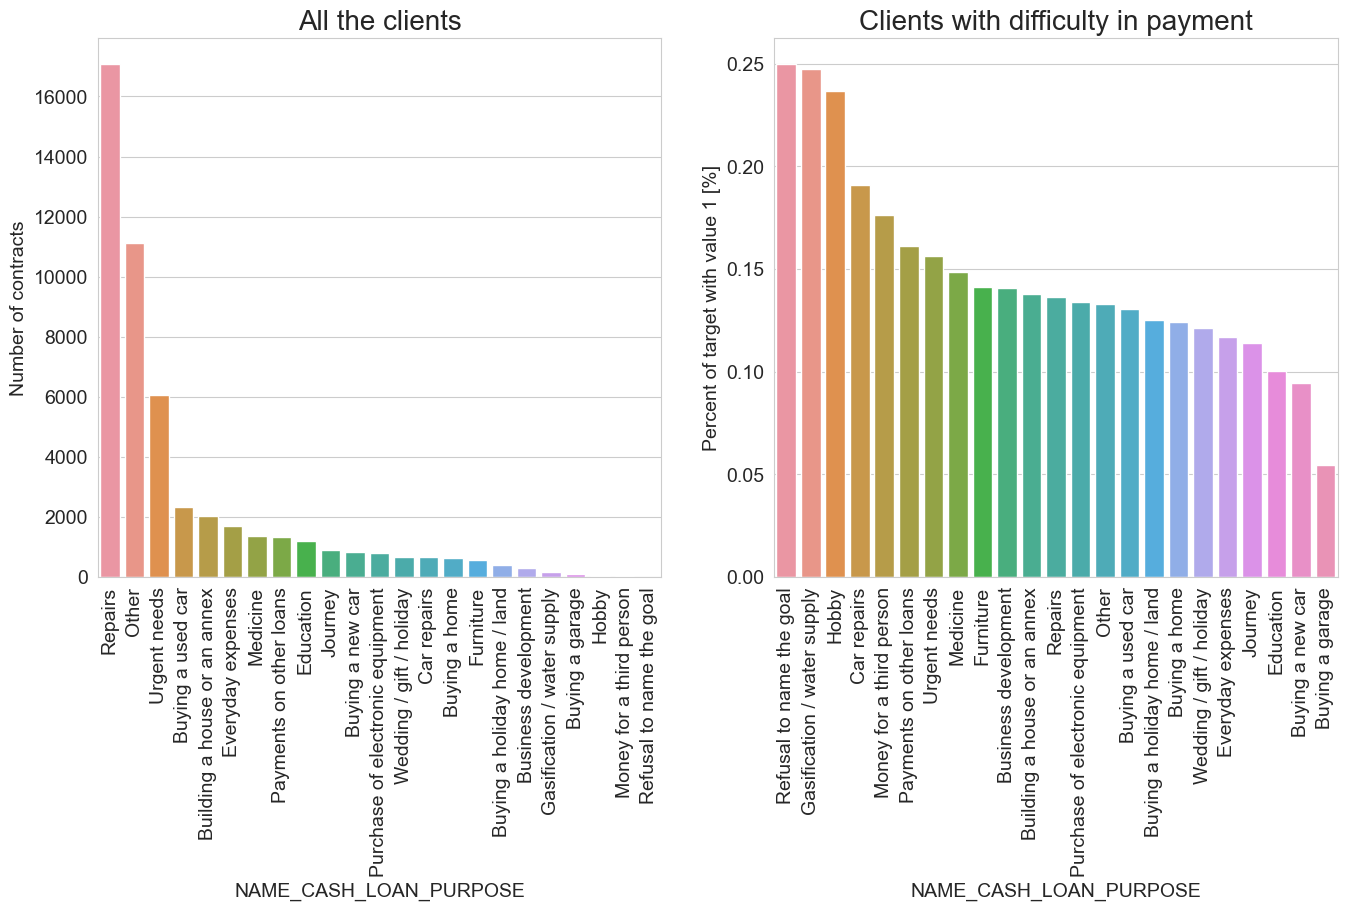

In [92]:
plot_target(appData_merge,'NAME_CASH_LOAN_PURPOSE', 'CASH LOAN PURPOSE')

Observation
- Most contracts taken by clients state their goal is repairs
- Clients who refuse to state their goals have high percentage of difficulty in payment of loans

###  Bivariate analysis

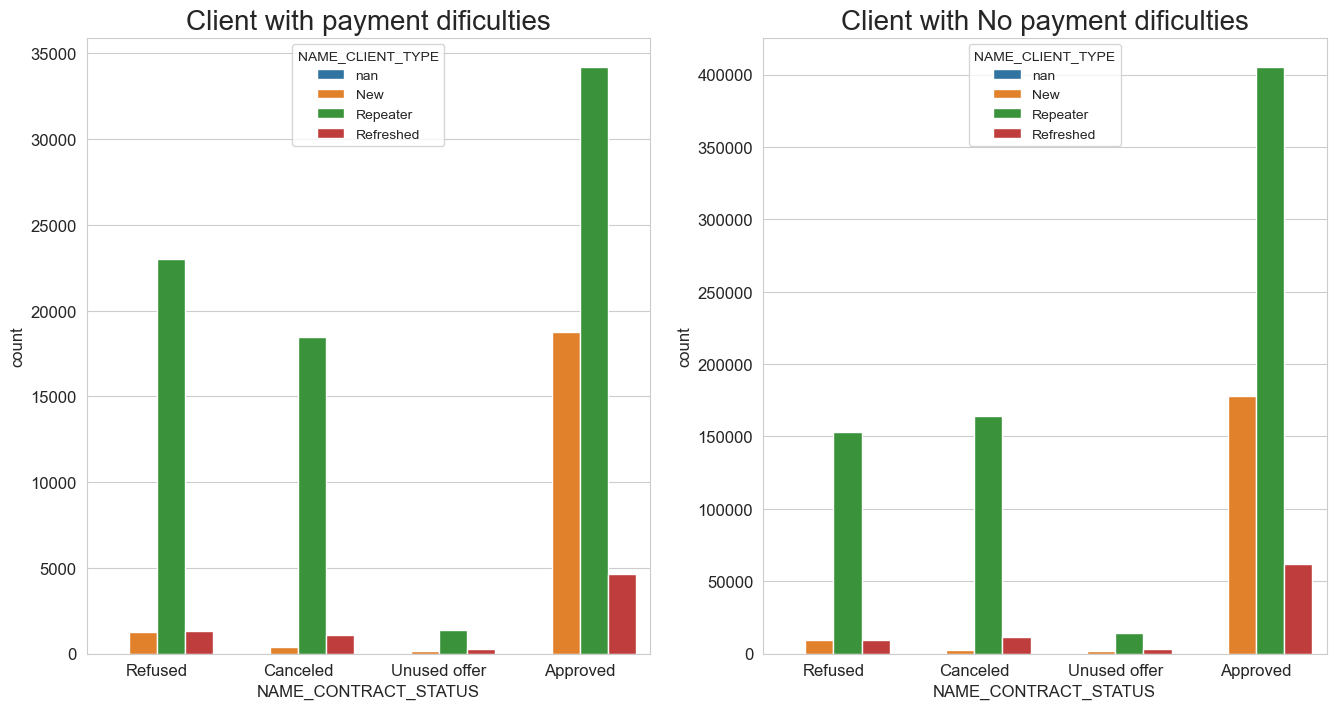

In [93]:

plot_cat_cat(appData_merge,'NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE')

Observation
- Clients who are repeaters and have been refused before have more chances of difficulty in repayment of loans
- Clients who are new and the previous application getting cancelled have difficulty in repayment of loans

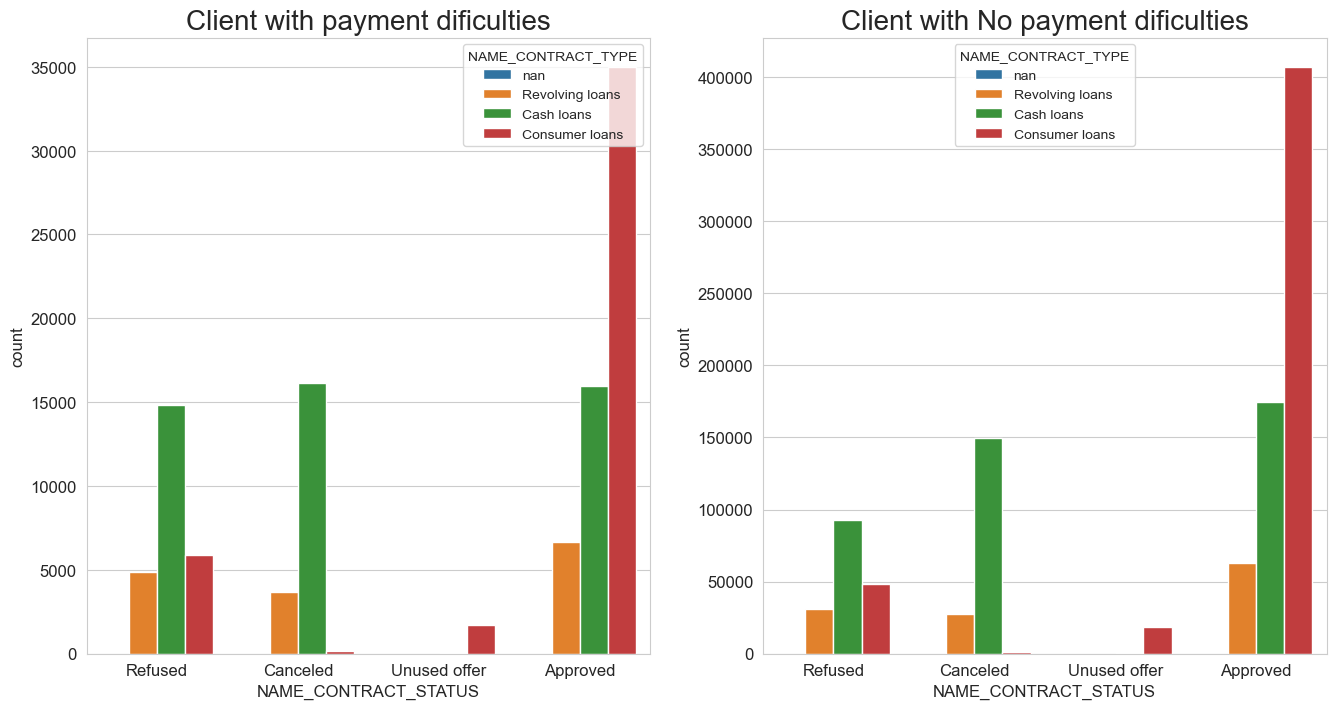

In [94]:
plot_cat_cat(appData_merge,'NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE')


Observation
- Clients with cash loans which were refused before have more difficulty in loan repayment

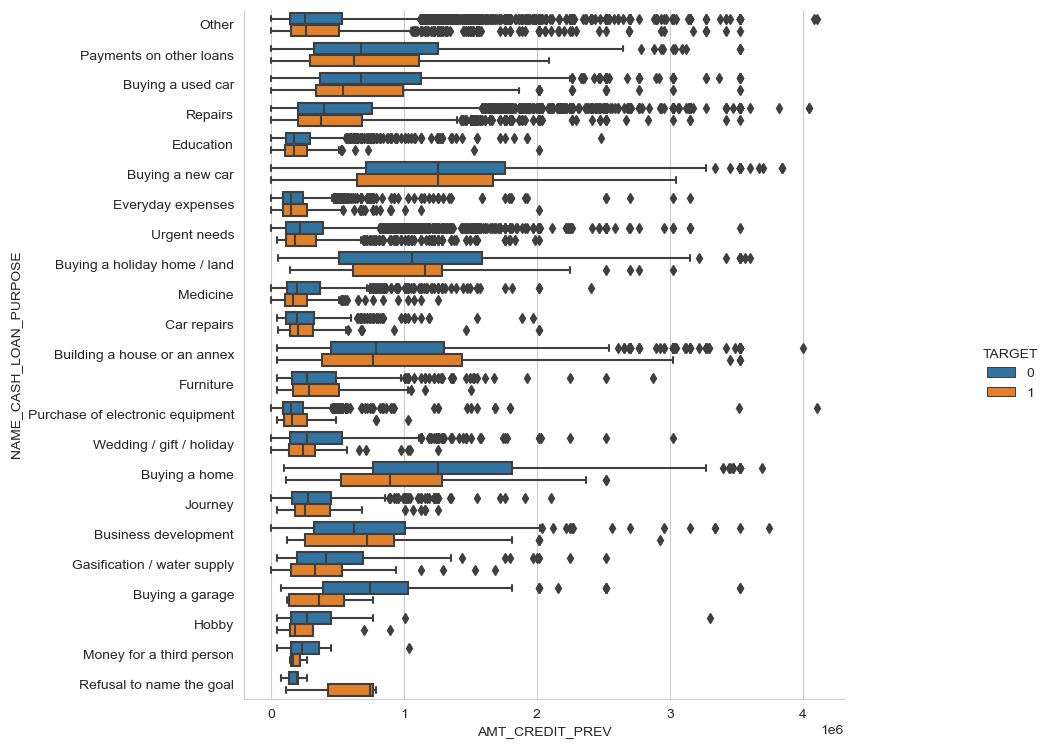

In [95]:
plot_cat_nume(appData_merge, 'AMT_CREDIT_PREV', 'NAME_CASH_LOAN_PURPOSE')

Observation
- Clients who refuse to name their goal with high amount credit tend to have payment difficulties

### Conclusion

#### Defaulters' demography

##### Application data

- The clients with maternity leave as their income type seem to have high % of payment difficulties, so they are the driving factors to be avoided
- The clients with low skilled laborers as their occupation type have high% of payment difficulties, so they are the driving factors to be avoided
- The clients with lower secondary as their education type have higher% of payment difficulties, so they are also one of the driving factors to be avoided

##### Previous Application Data

- The clients with Refusal to name the goal as their loan purpose have higher % of payment difficulties, so they are also one of the driving factors to be avoided

- The clients with Refused loans as their previous contract status also have higher % of payment difficulties, so they are also one of the driving factors to be avoided

- The clients with Revolving Loans as their previous contract type also have higher % of payment difficulties, so they are also one of the driving factors to be avoided


#### Credible applications

- According to data most of the defaulters are working clients, however this is just a correlation but not a causation. Hence proper scrutiny must be done on other parameters before the refusing the application of loan. 

- In the given data female applicants have more difficulties in count when compared to male applicants but when compared in percentages, they do not make much difference. Hence there should not be any bais based on gender.
